# 1.Problem Description 

RE. of dataset : https://www.kaggle.com/datasets/hellbuoy/car-price-prediction

Problem Description : 

    By performing steps of data analysis , to build prediction model , by multiple linear regression ( libraries : sklearn ) . 
    Demonstrating techniques like : 
        1. RFE ( feature selection ) , 
        2. VIF ( reduce collinearity ) or 
        3. residual analysis ( discover problems violating assumptions of LR in final model ) 
    
Result Description : 
    - r2 score : 
    - RMSE : 

# 2. Import 

# Libraries

In [1120]:
# Basics libraries 
import numpy as np 
import pandas as pd 

# 3. EDA 
# Visualisation 
import matplotlib.pyplot as plt 
import seaborn as sns

# 4.Data Preprocessing 

# 4.2 feature selection 
from sklearn.feature_selection import RFECV

# 4.3 Data transformation 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # feature scaling 
from sklearn.preprocessing import OneHotEncoder # feature encoding 

# 5. Model evaluation 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 

# 6. Build model 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge 
from sklearn.linear_model import ElasticNet
import statsmodels.api as sm 

# 7. Model evaluation 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeCV 

# Check for multicollinearity : VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# warnings 
import warnings 
warnings.filterwarnings("ignore")

# Data

In [1121]:
df = pd.read_csv('carPrice_Assignment.csv')

# 3. EDA

In [1122]:
pd.set_option('display.max_columns',None)
print(f'Shape of df : {df.shape}')
df.head()
# insight : 
# shape of df , obtain more context from data

Shape of df : (205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [1123]:
df.info()
# insight : 
# no null count , dtype of all colums 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [1124]:
df.loc[df.duplicated()]
# no duplicates 

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [1125]:
# Replace columns header to a more interpretable one 
replace_col = ['ID','actuarialRisk','Name','fuelType',
               'aspiration','doorNum','body','driveWheel',
               'engineLoc','wheelBase','bodyLength','bodyWidth',
               'bodyHeight','curbWeight','engineType','cylinderNum',
               'engineSize','fuelSystem','boreRatio','stroke','compressionRatio',
               'horsePower','peakRPM','cityMPG','highwayMPG','price']

df = df.set_axis(replace_col,axis=1,inplace=False)
print(f'Shape of df : {df.shape}')
df.head()

Shape of df : (205, 26)


,ID,actuarialRisk,Name,fuelType,aspiration,doorNum,body,driveWheel,engineLoc,wheelBase,bodyLength,bodyWidth,bodyHeight,curbWeight,engineType,cylinderNum,engineSize,fuelSystem,boreRatio,stroke,compressionRatio,horsePower,peakRPM,cityMPG,highwayMPG,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [1126]:
# Drop ['ID '] , since it has nothing to do with analysis 
df = df.drop(['ID'],axis=1)

In [1127]:
df.describe()
# insight : 
# may have outliers : curbWeight , engineSize , 
# compressionRatio , horsePower , price

,actuarialRisk,wheelBase,bodyLength,bodyWidth,bodyHeight,curbWeight,engineSize,boreRatio,stroke,compressionRatio,horsePower,peakRPM,cityMPG,highwayMPG,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Feature Creation : ['Name'] -> ['price_level']

In [1128]:
# observe more detaily into ['Name']
df.Name = df.Name.apply(lambda x:x.split(" ")[0])
df.Name.value_counts()
# there are some misspelled name : 
# vw , maxda , toyouta , vokswagen , Nissan , porcshceChung Ki Jerry Chan

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: Name, dtype: int64

In [1130]:
# modify ['Name'] , and replace back to carPrice_df 
df['Name'] = df['Name'].replace({'maxda': 'mazda', 
                                 'Nissan': 'nissan', 
                              'porcshce': 'porsche', 
                                 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 
                                 'vw': 'volkswagen'})
df.head()

,actuarialRisk,Name,fuelType,aspiration,doorNum,body,driveWheel,engineLoc,wheelBase,bodyLength,bodyWidth,bodyHeight,curbWeight,engineType,cylinderNum,engineSize,fuelSystem,boreRatio,stroke,compressionRatio,horsePower,peakRPM,cityMPG,highwayMPG,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


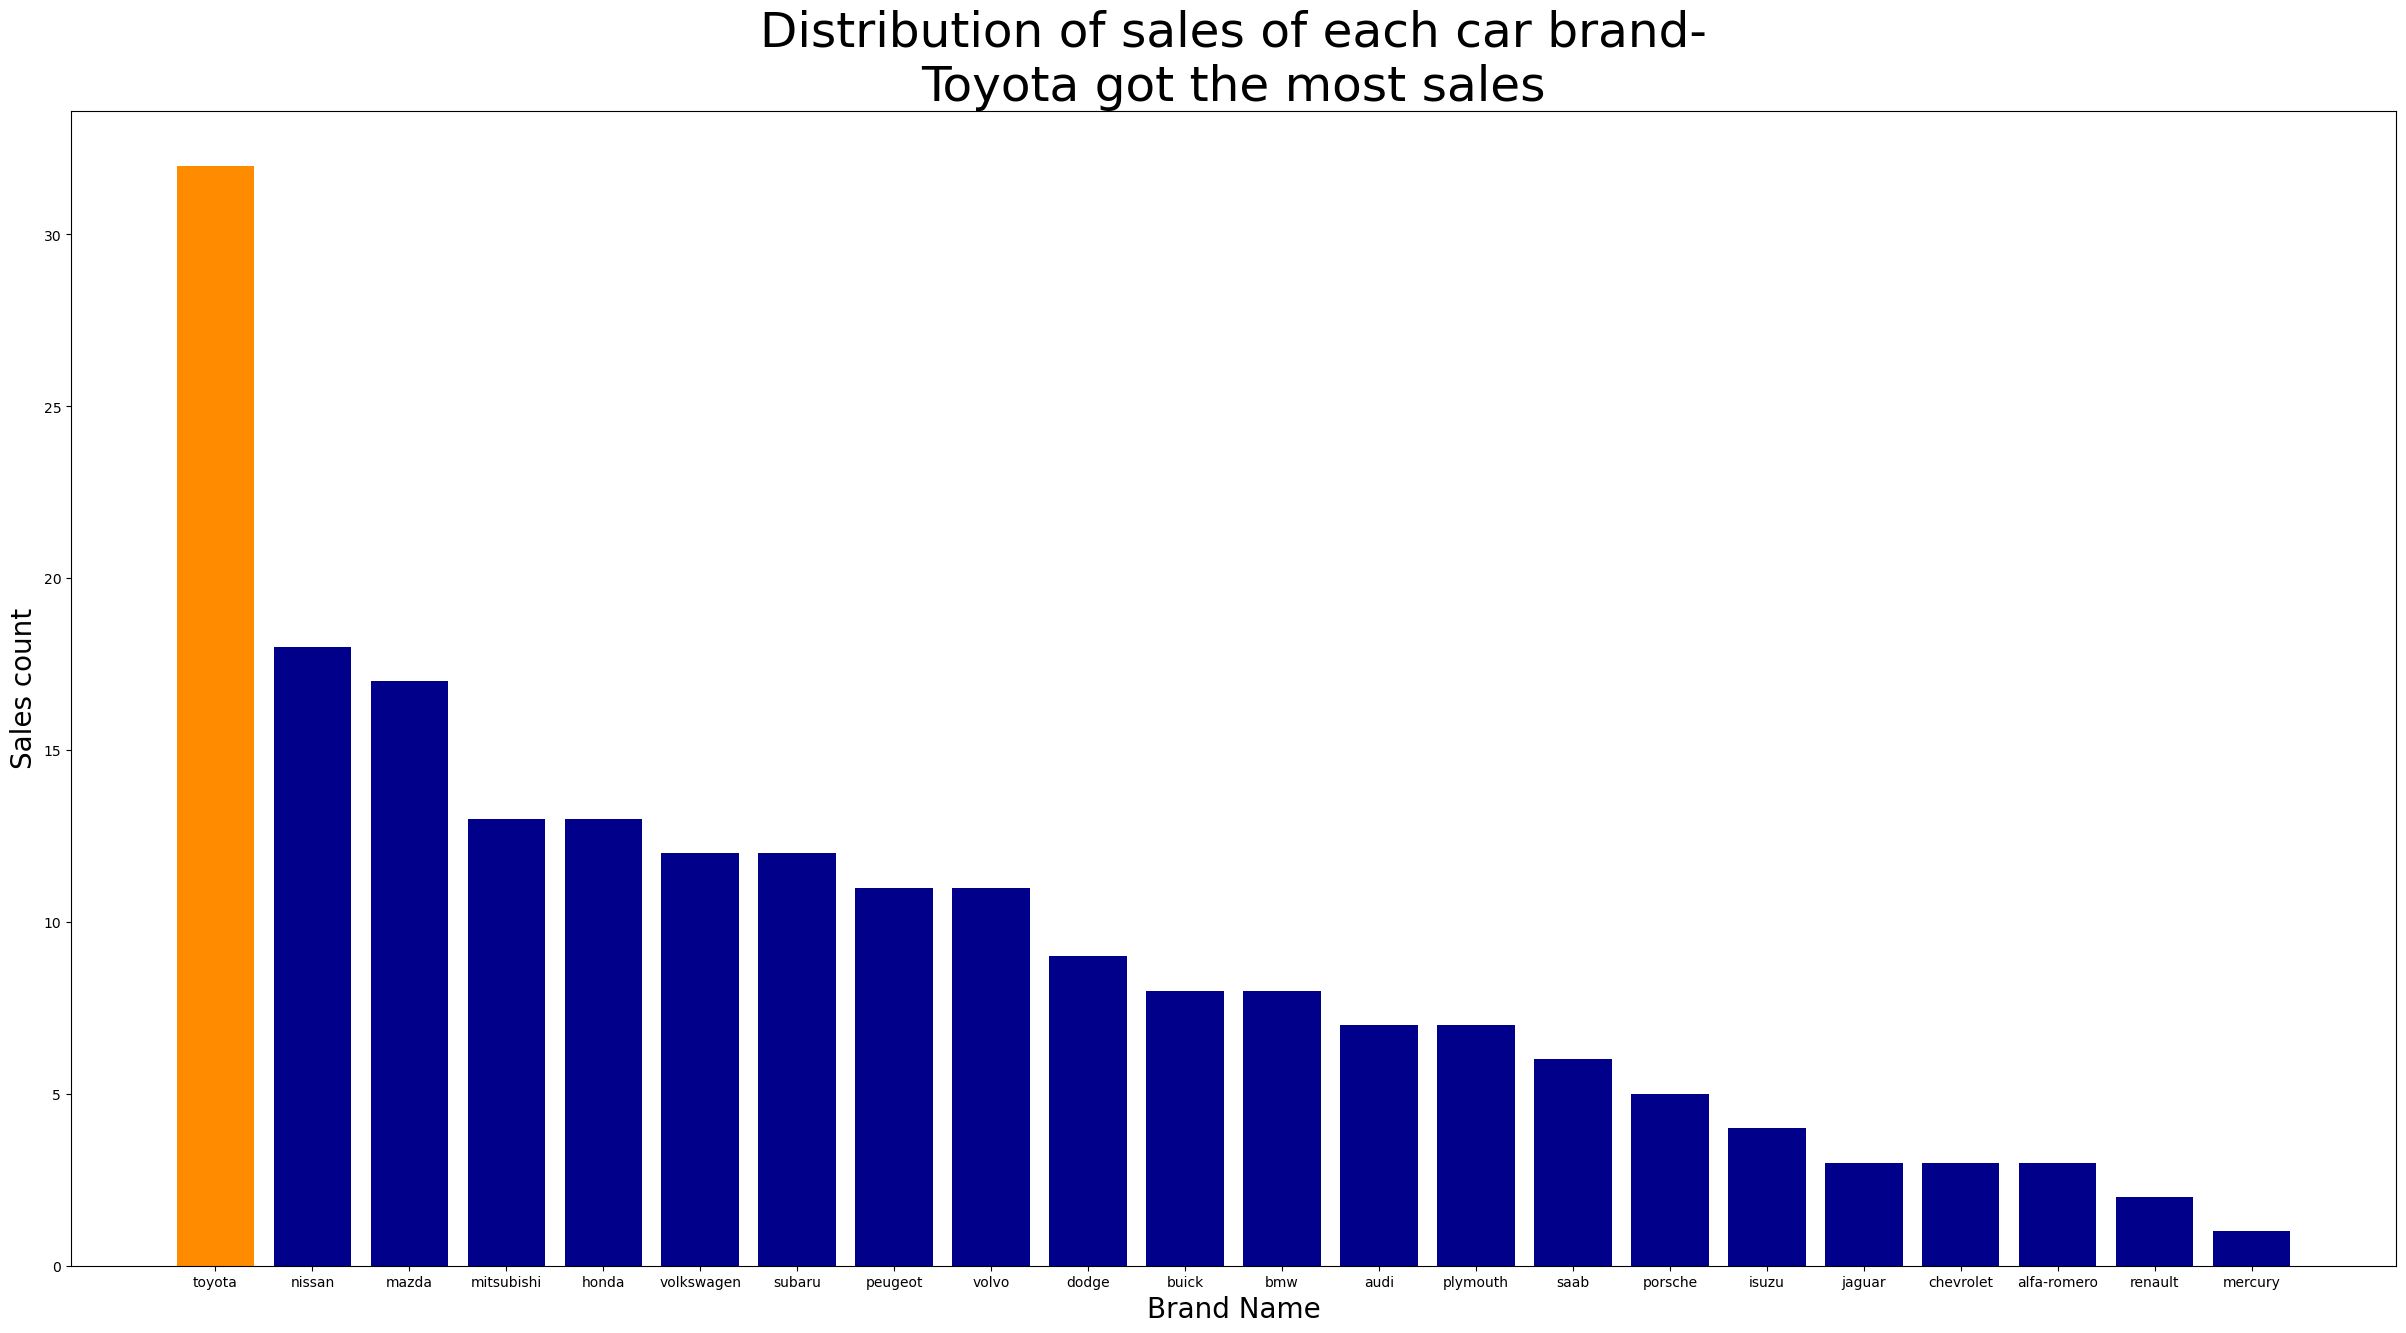

In [1131]:
# Plot ['Name'] for observing counts of each brand
def plotName_counts(input_df) : 
    plt.figure(figsize=(30,15))

    categories = pd.Series(input_df['Name'].unique())
    value = pd.Series(list(input_df['Name'].value_counts(sort=False)))

    nameCount_df = pd.concat([categories,value],axis=1,keys=['Brand','Counts']).sort_values(by='Counts',ascending=False)
    brand = list(nameCount_df['Brand'])
    counts = list(nameCount_df['Counts'])

    color = ['darkblue'] * len(brand)
    max_index = np.argmax(counts)
    color[max_index] = 'darkorange'

    plt.title('Distribution of sales of each car brand-\nToyota got the most sales',fontsize=35)
    plt.bar(brand,counts,color=color)
    plt.xlabel('Brand Name',fontsize=20)
    plt.ylabel('Sales count',fontsize=20)
    
plotName_counts(df)
# Below we can see brand : toyota , has the most sales which exceed 30 

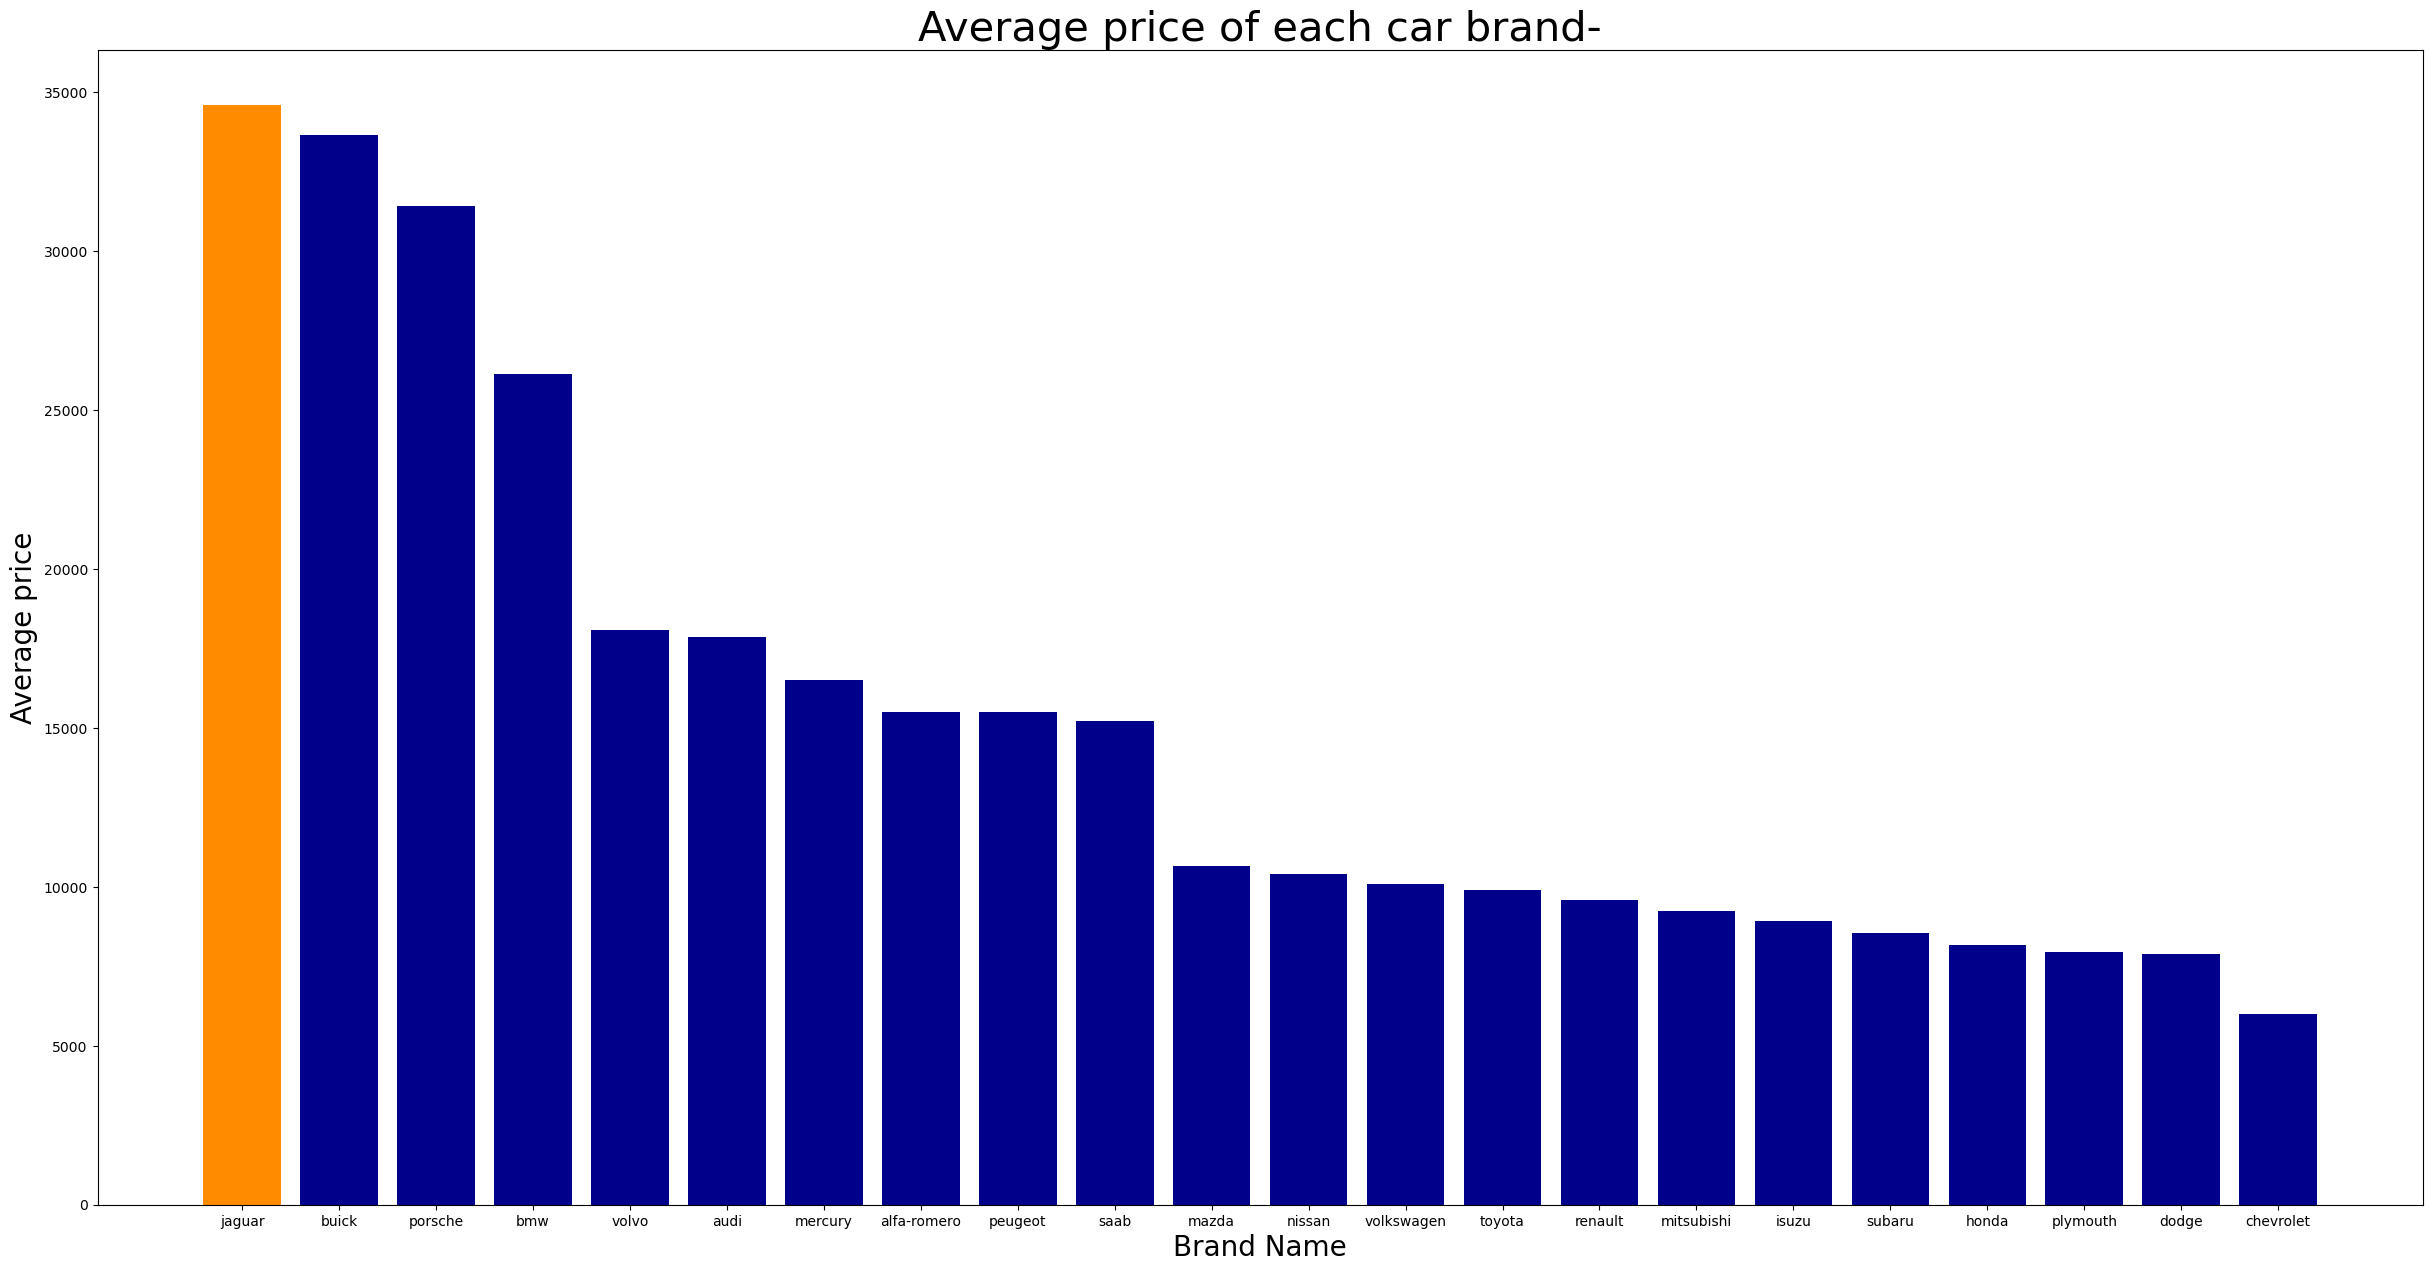

In [1132]:
# plot ['Name'] against average price
def plotName_price(input_df) : 
    plt.figure(figsize=(30,15))
    
    namePrice_df = input_df[['Name','price']]
    namePrice_df = namePrice_df.groupby(by=['Name']).mean().sort_values(by='price',ascending=False).reset_index()

    brand = list(namePrice_df['Name'])
    avgPrice = list(namePrice_df['price'])

    color = ['darkblue'] * len(brand)
    max_index = np.argmax(avgPrice)
    color[max_index] = 'darkorange'

    plt.title('Average price of each car brand-',fontsize=30)
    plt.bar(brand,avgPrice,color=color)
    plt.xlabel('Brand Name',fontsize=20)
    plt.ylabel('Average price',fontsize=20)
    
plotName_price(df)
# insight : 
# jaguar has the highest average price ( which is fair , jaguar's car is expensive ! )

# Discover distribution of target : ['price']

<AxesSubplot:title={'center':"Density graph of 'price'"}, xlabel='price', ylabel='Density'>

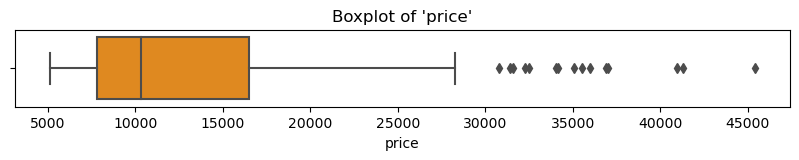

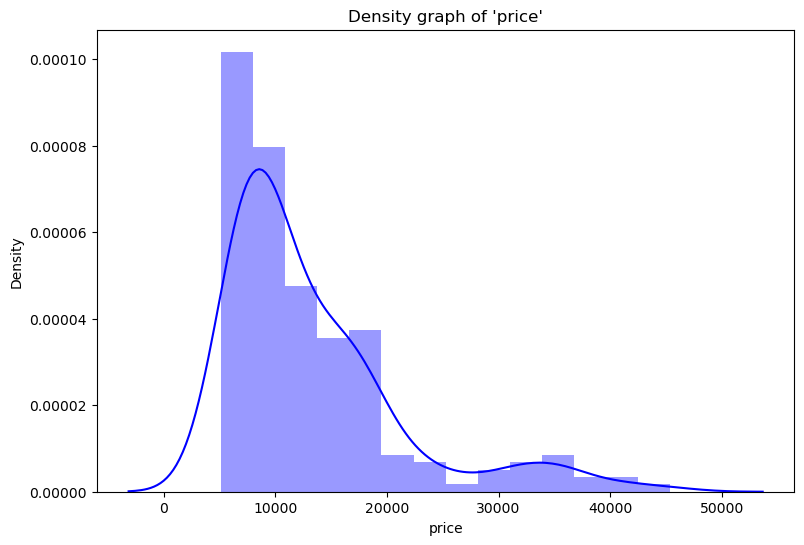

In [1133]:
# check for outlier of ['price']

plt.figure(figsize=(10,1))
plt.title('Boxplot of \'price\'')
sns.boxplot(data=df,x='price',fliersize=5,color='darkorange')

plt.figure(figsize=(9,6))
plt.title('Density graph of \'price\'')
sns.distplot(df['price'],kde=True,color='blue')

# there are quite a lot outliers in ['price']Chung Ki Jerry Chan

# Decide whether or not to drop outliers

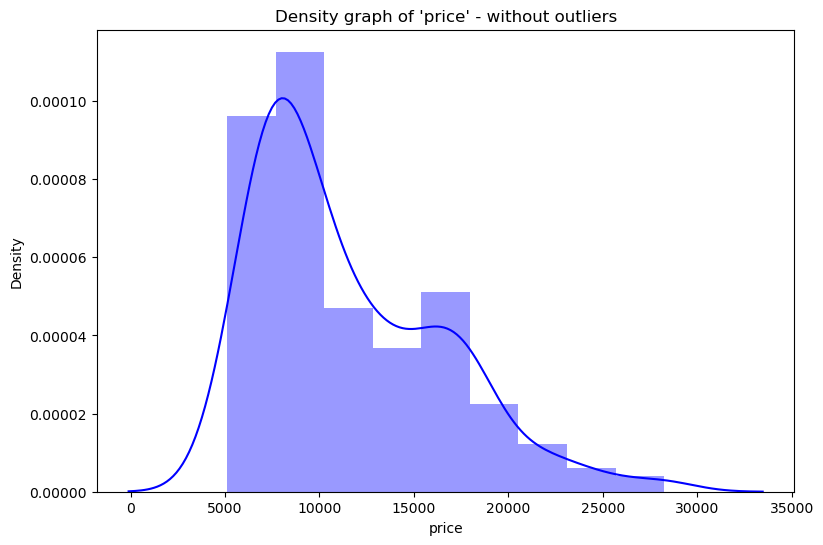

In [1134]:
# lets investigate the effect of outliers to data distribution in ['price']
# 3 major factors determine what should we do with outliers 
# 1 : source of outliers : due to collection error , or its just rare in nature ? 
# 2 : magnitude of outliers : would it be extreme that its not representative to underlying distribution ? 
# 3 : impact of outlier to model : would it make the model perform poorly ? 

X = df['price']
Q1, Q3 = np.percentile(X, [25, 75])

# Calculate the IQR
IQR = Q3 - Q1

# Filter out the outliers
outlierFree_X = X[(X >= Q1 - 1.5 * IQR) & (X <= Q3 + 1.5 * IQR)]

# plot the graph with outlierFree_X
# check for outlier of ['price']

plt.figure(figsize=(9,6))
plt.title('Density graph of \'price\' - without outliers')
sns.distplot(outlierFree_X,kde=True,color='blue')
plt.show()

# No need to remove outlier so far: since the underlying distribution is similiar enough
# WE COULD DO IT WHEN WE DO DATA SCALING  

In [1135]:
# Separate carBrand by price level 
# adding ['carCategories'] with label ['low','mid','high'] indicate price range of the car 
df['price'] = df['price'].astype('int')
df_temp = df.copy()

t = df_temp.groupby(['Name'])['price'].mean()
df_temp = df_temp.merge(t.reset_index(), how='left',on='Name')

bins = [0,10000,20000,40000]
label =['low','mid','high']
df['priceLevel'] = pd.cut(df_temp['price_y'],bins,right=False,labels=label)
df.head()

# Drop ['Name'] as we've already finish feature creation 
df = df.drop(['Name'],axis=1)
print(f'Shape of df now : {df.shape}')
df.head()

Shape of df now : (205, 25)


,actuarialRisk,fuelType,aspiration,doorNum,body,driveWheel,engineLoc,wheelBase,bodyLength,bodyWidth,bodyHeight,curbWeight,engineType,cylinderNum,engineSize,fuelSystem,boreRatio,stroke,compressionRatio,horsePower,peakRPM,cityMPG,highwayMPG,price,priceLevel
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,mid
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,mid
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,mid
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,mid
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,mid


# Discover Distribution of quan data

# Separate quan_data & qua_data

In [1136]:
qua_col = ['actuarialRisk','fuelType','aspiration','doorNum','body','driveWheel','engineLoc','engineType','cylinderNum','fuelSystem','priceLevel']
qua_data = df[qua_col]
quan_col = list(df.drop(qua_col,axis=1).columns)
quan_data = df[quan_col]

In [1137]:
print(f'shape of qua_data : {qua_data.shape}')
qua_data.head()

shape of qua_data : (205, 11)


,actuarialRisk,fuelType,aspiration,doorNum,body,driveWheel,engineLoc,engineType,cylinderNum,fuelSystem,priceLevel
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,mid
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,mid
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,mid
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,mid
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,mid


In [1138]:
print(f'shape of quan_data : {quan_data.shape}')
quan_data.head()

shape of quan_data : (205, 14)


,wheelBase,bodyLength,bodyWidth,bodyHeight,curbWeight,engineSize,boreRatio,stroke,compressionRatio,horsePower,peakRPM,cityMPG,highwayMPG,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


# Observe relationships of quan_data to price 

<Figure size 1200x1200 with 0 Axes>

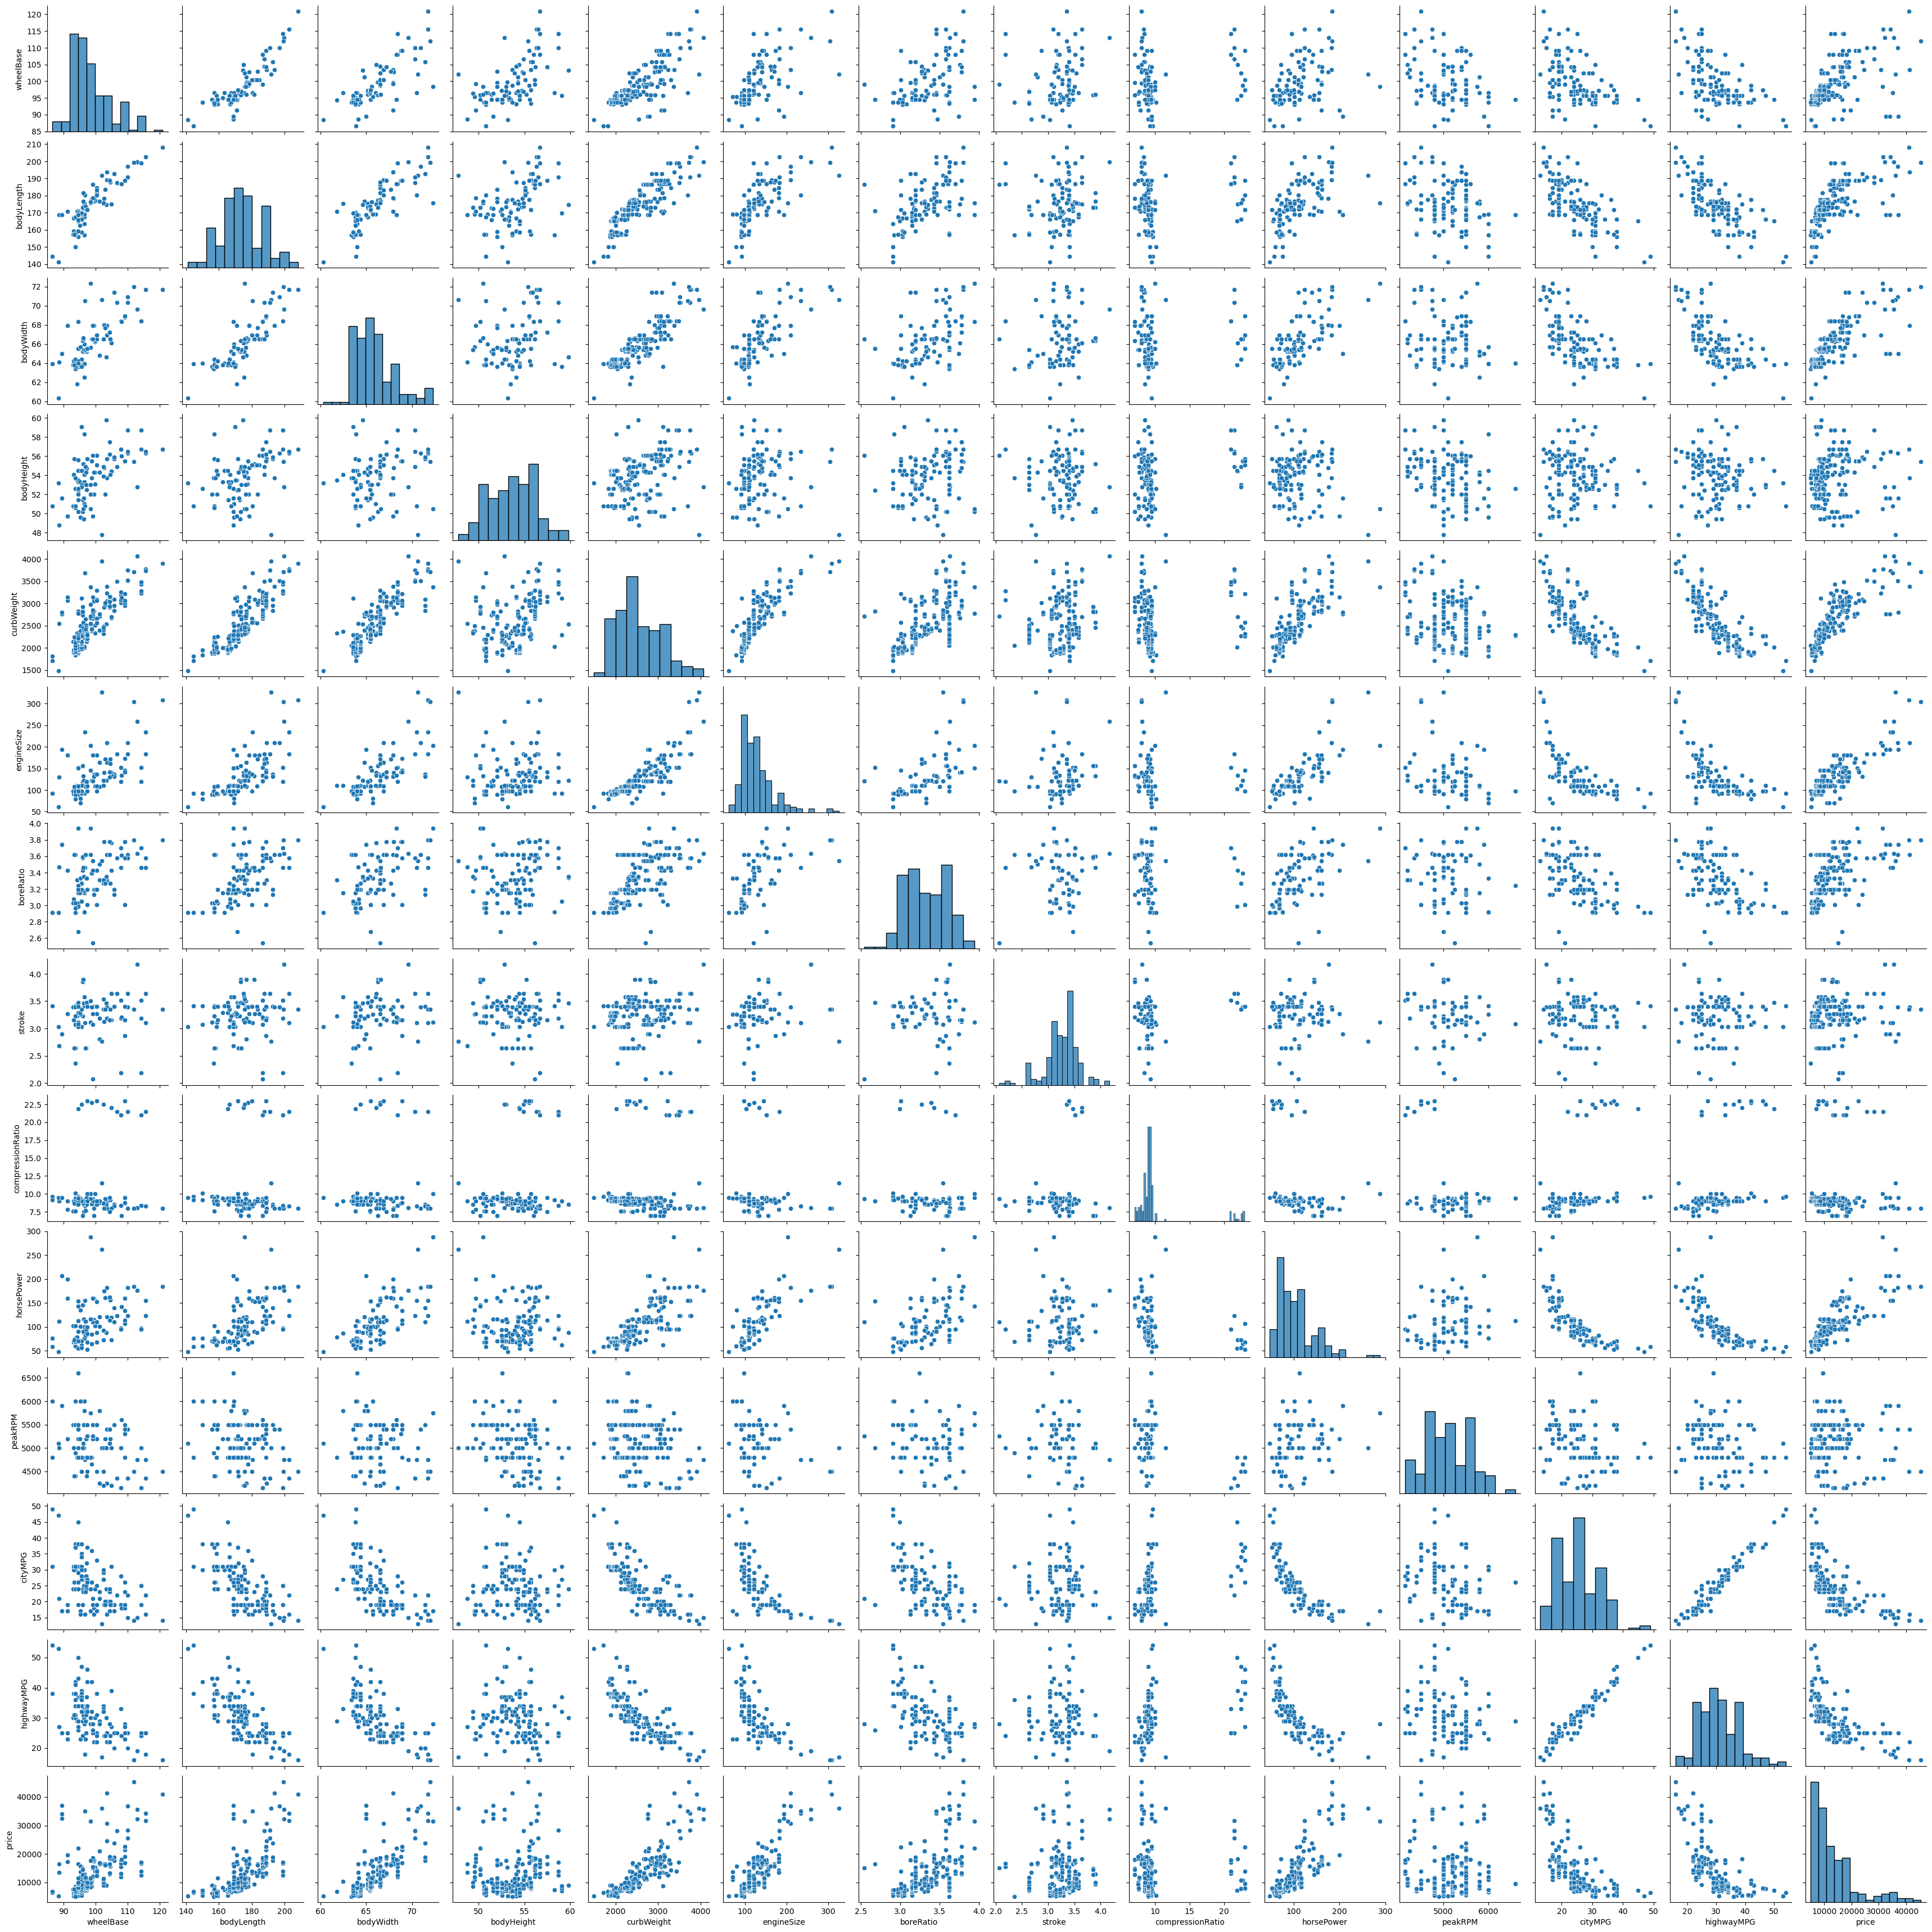

In [1139]:
# plot pairplot for quantitative data 
plt.figure(figsize=(12,12))
sns.pairplot(quan_data)
plt.show()
# outliers : compressionRatio , horsePower , peakRPM , cityMPG
# Relationship of features to price : 
# positive : wheelBase , bodyLength , bodyWidth . curbWeight , engineSize , horsePower 
# negative : cityMPG , highwayMPG 
# not so related : compressionRatio , stroke , boreRatio , peakRPM , bodyHeight 

# Observe Data Skewness (quan_data)

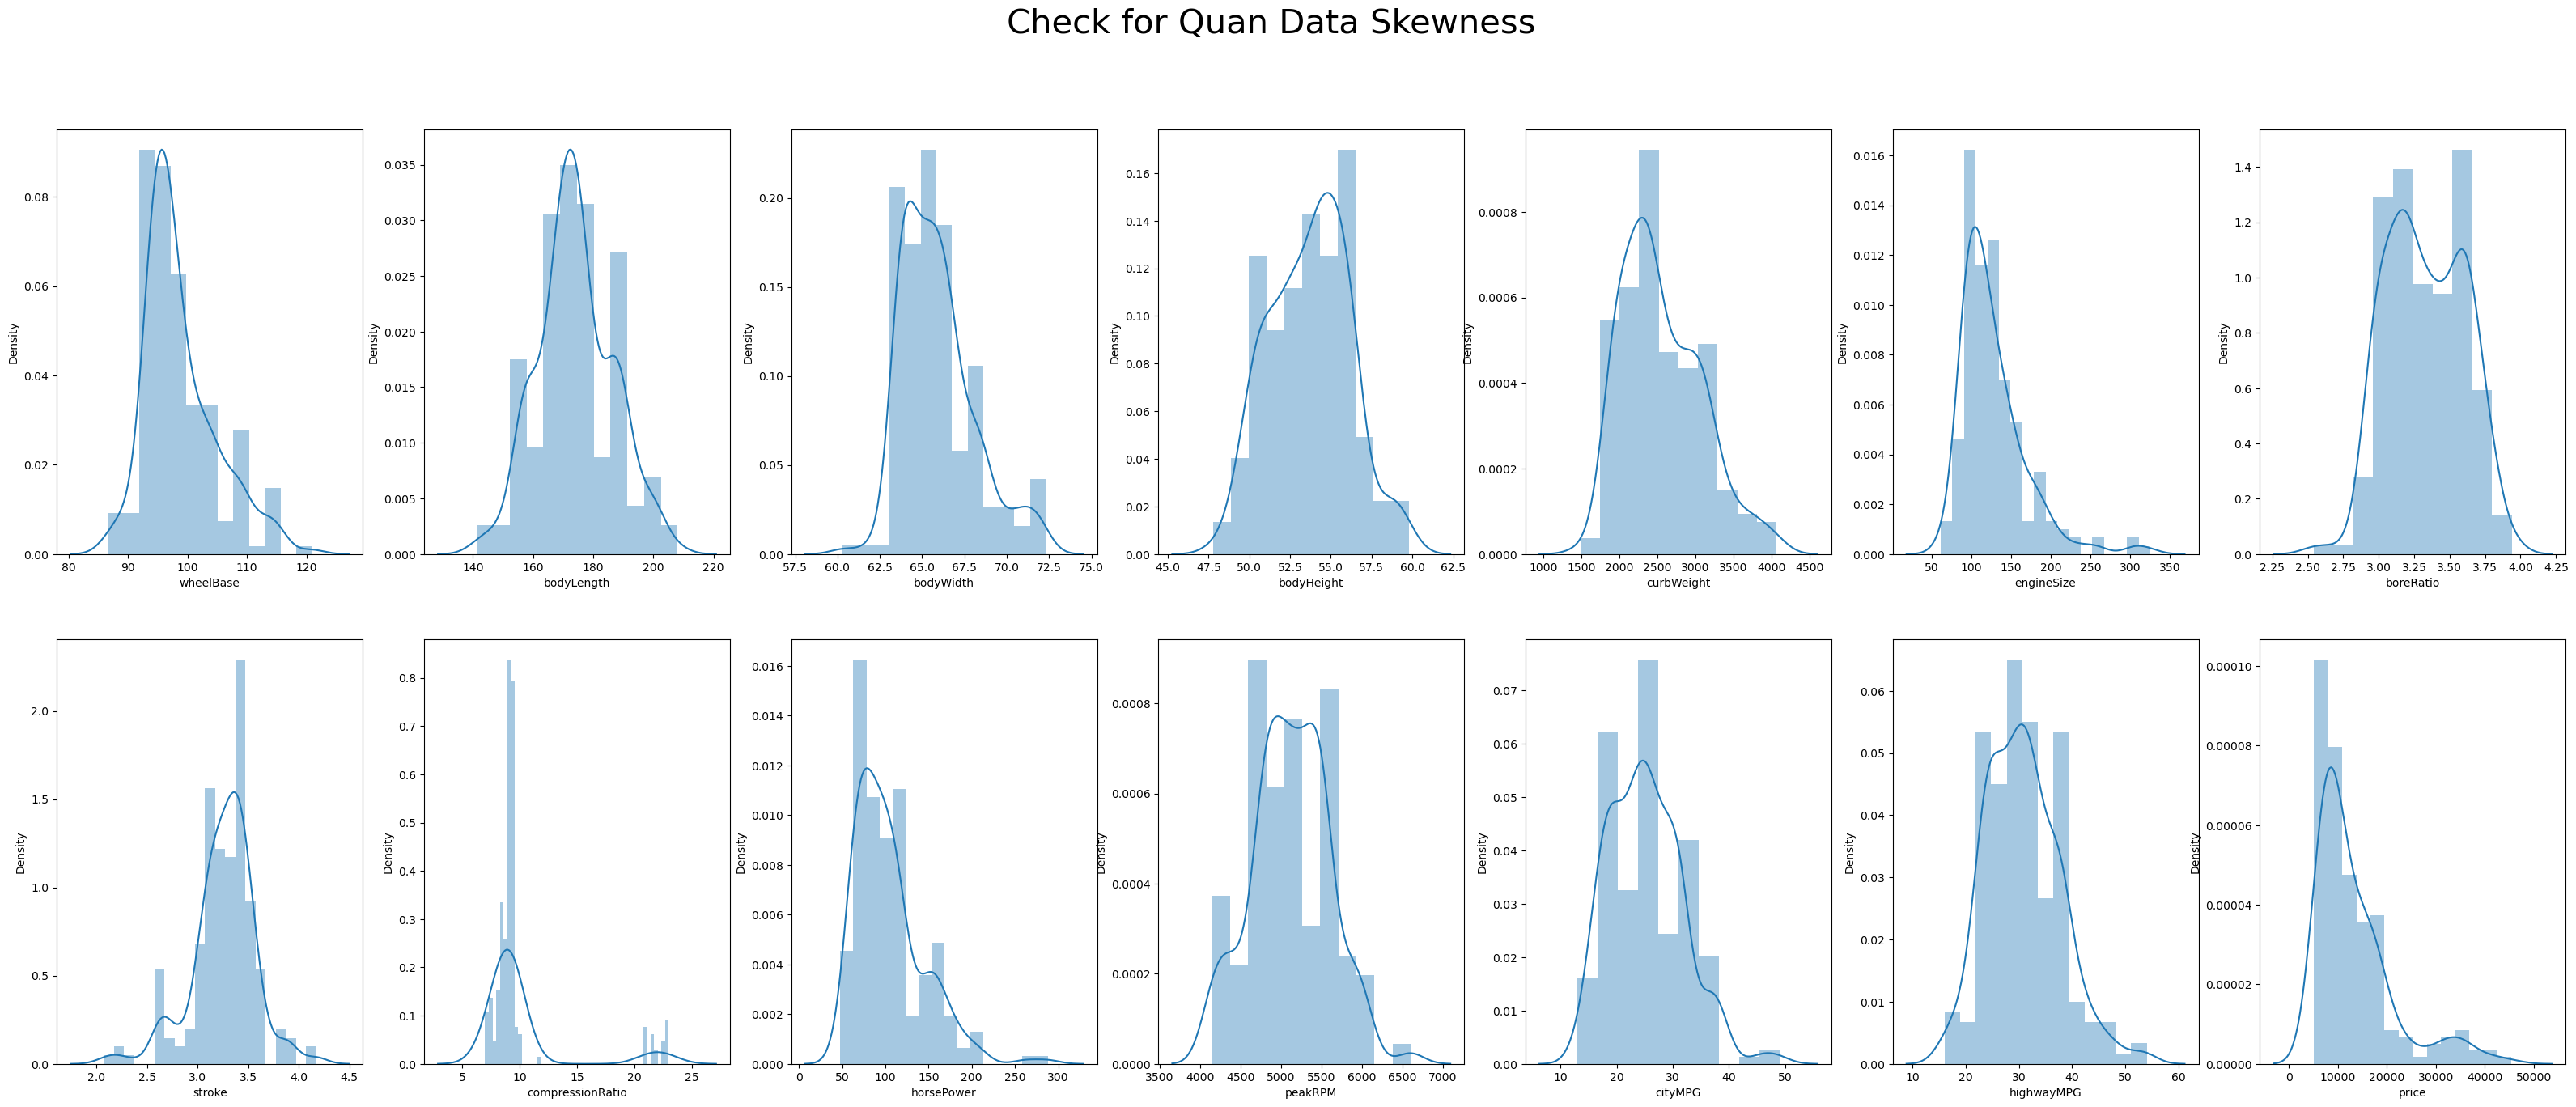

In [1140]:
plt.figure(figsize=(40,15))
columns = list(quan_data.columns) 
col_len = int(len(columns))

plt.suptitle('Check for Quan Data Skewness',fontsize=30)
for i in range(col_len): 
    plt.subplot(2,7,i+1)
    sns.distplot(quan_data[columns[i]],kde=True) 

# skewed : price , horsePower , engineSize  

# Observe outliers of quan_data

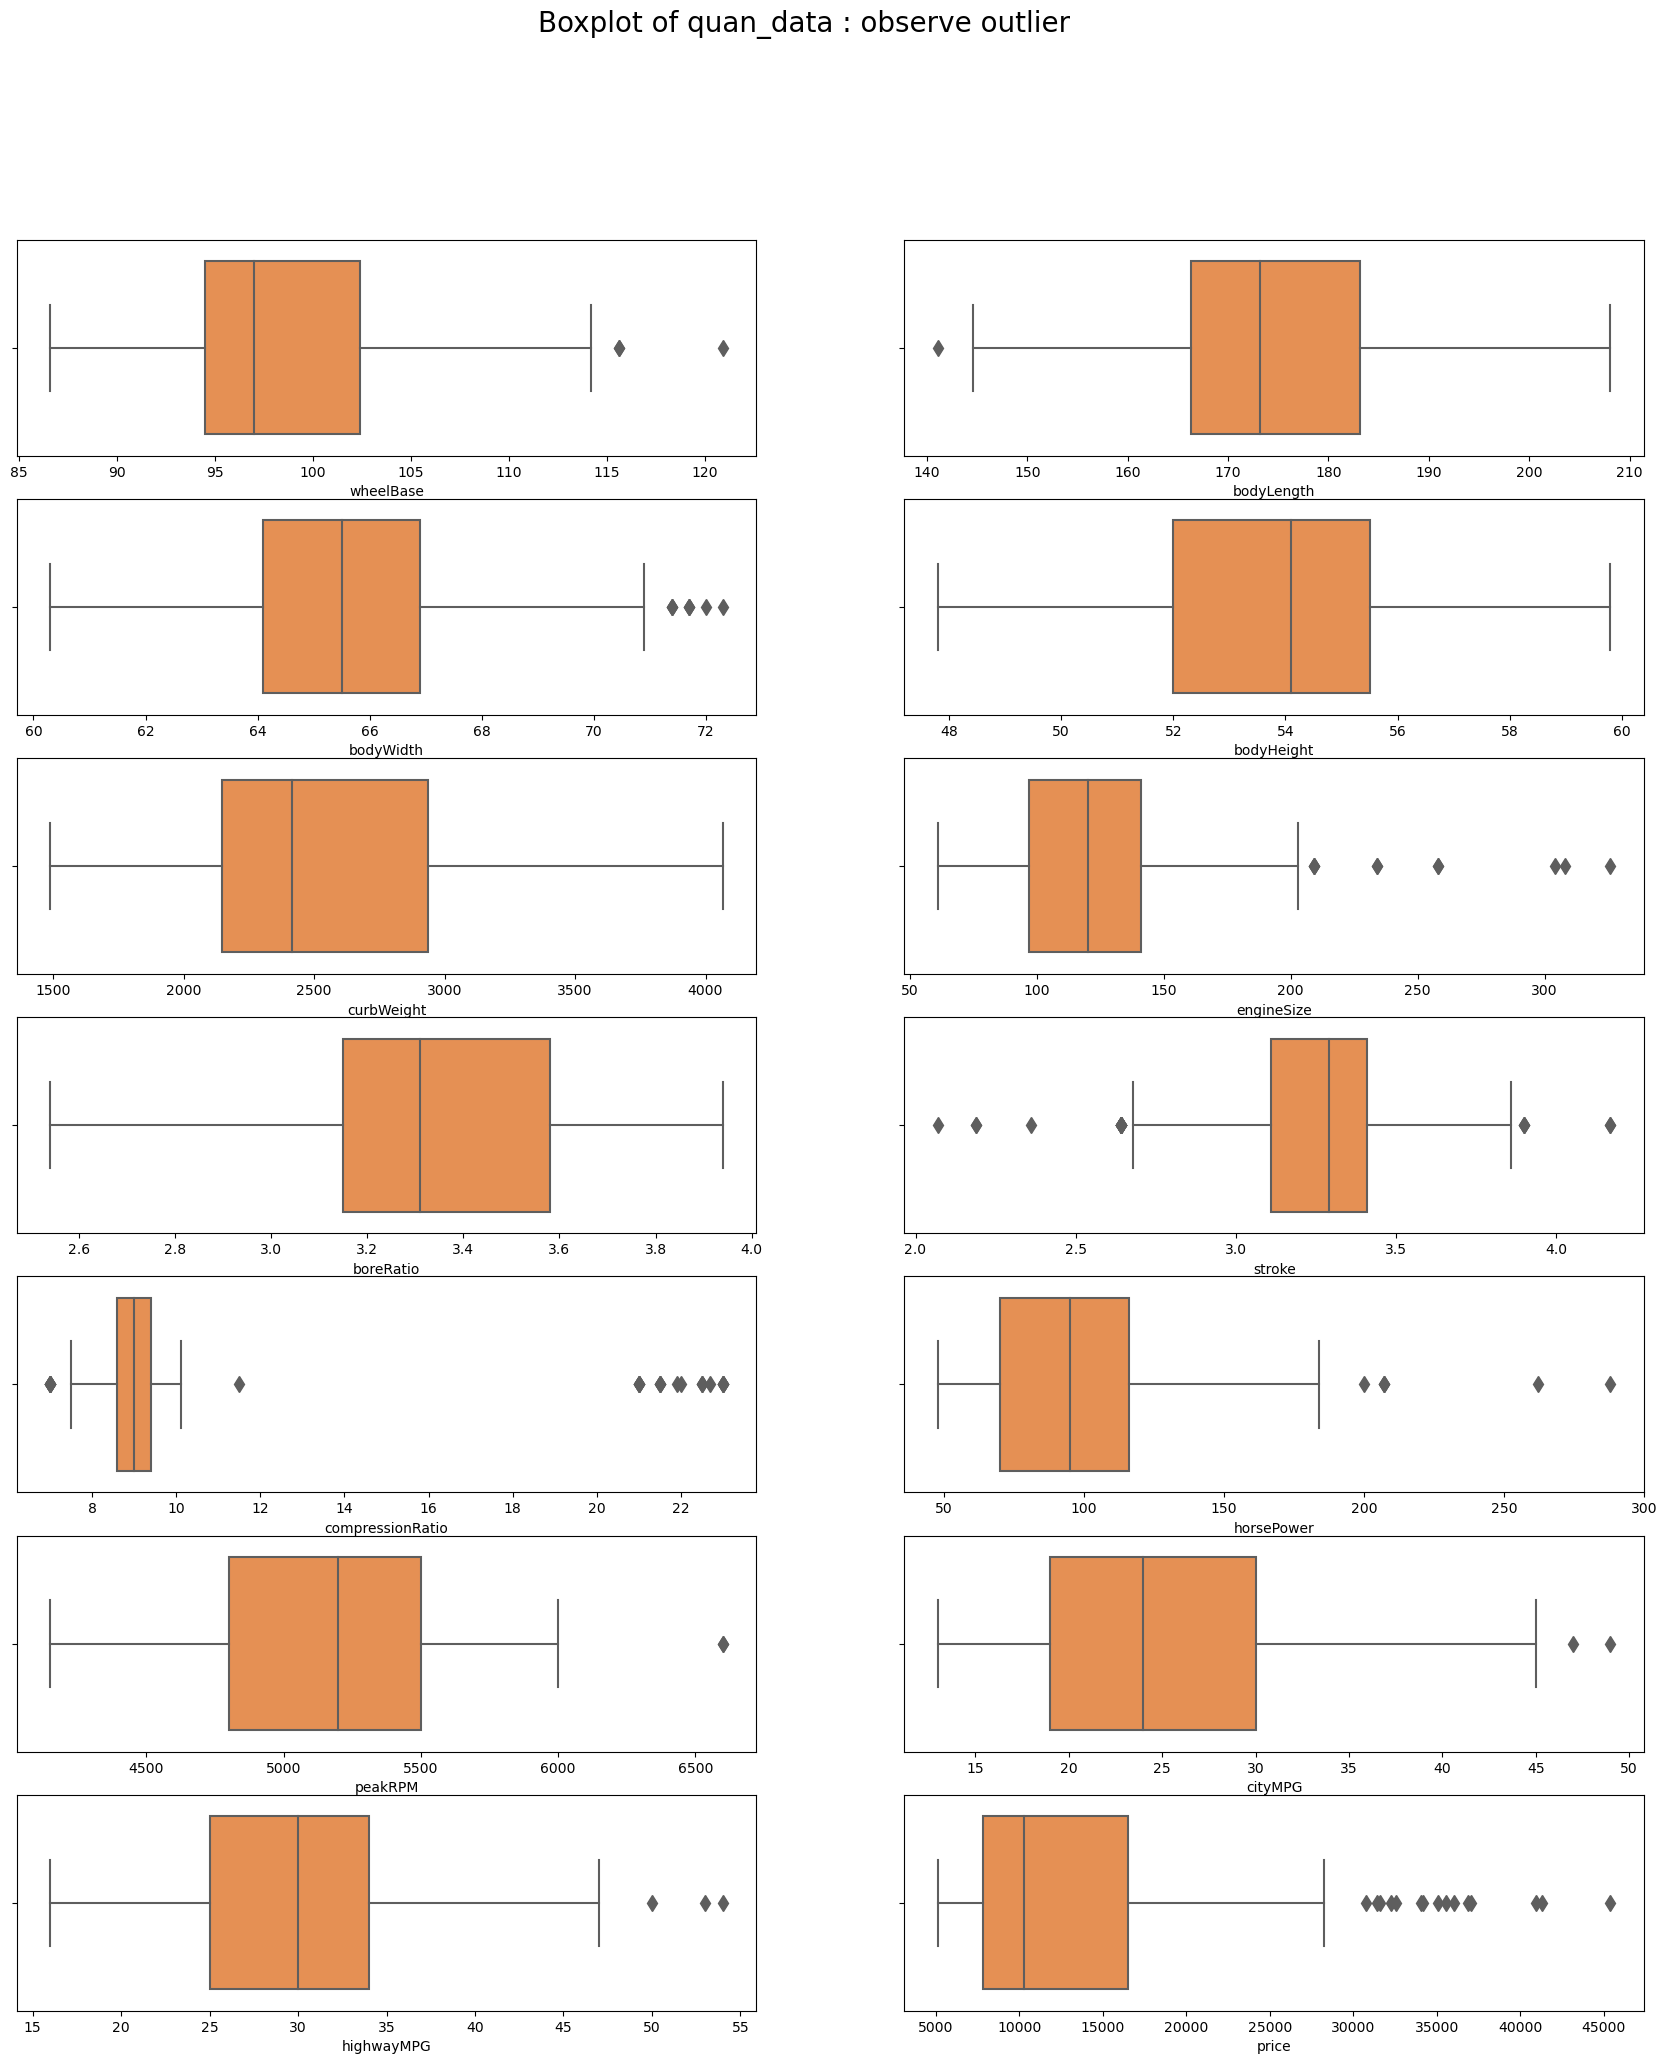

In [1141]:
# Check for outliers of carPrice_df_quan 
def boxPlot_quan(input_df) : 
    plt.figure(figsize=(21,23))
    columns = list(input_df.columns)
    col_len = int(len(columns))
    
    plt.suptitle('Boxplot of quan_data : observe outlier',fontsize=20)
    for i in range(1,col_len+1) : 
        plt.subplot(7,2,i)
        sns.boxplot(x=quan_data[columns[i-1]],data=input_df,fliersize=8,palette='Oranges')

boxPlot_quan(quan_data)
# outliers : price , compressionRatio , engineSize , stroke , horsePower 
# we can do data scaling to independent variables later , to cope with outliers 

# Discover distribution categorical data 

# Plot bar chart for categorical data 

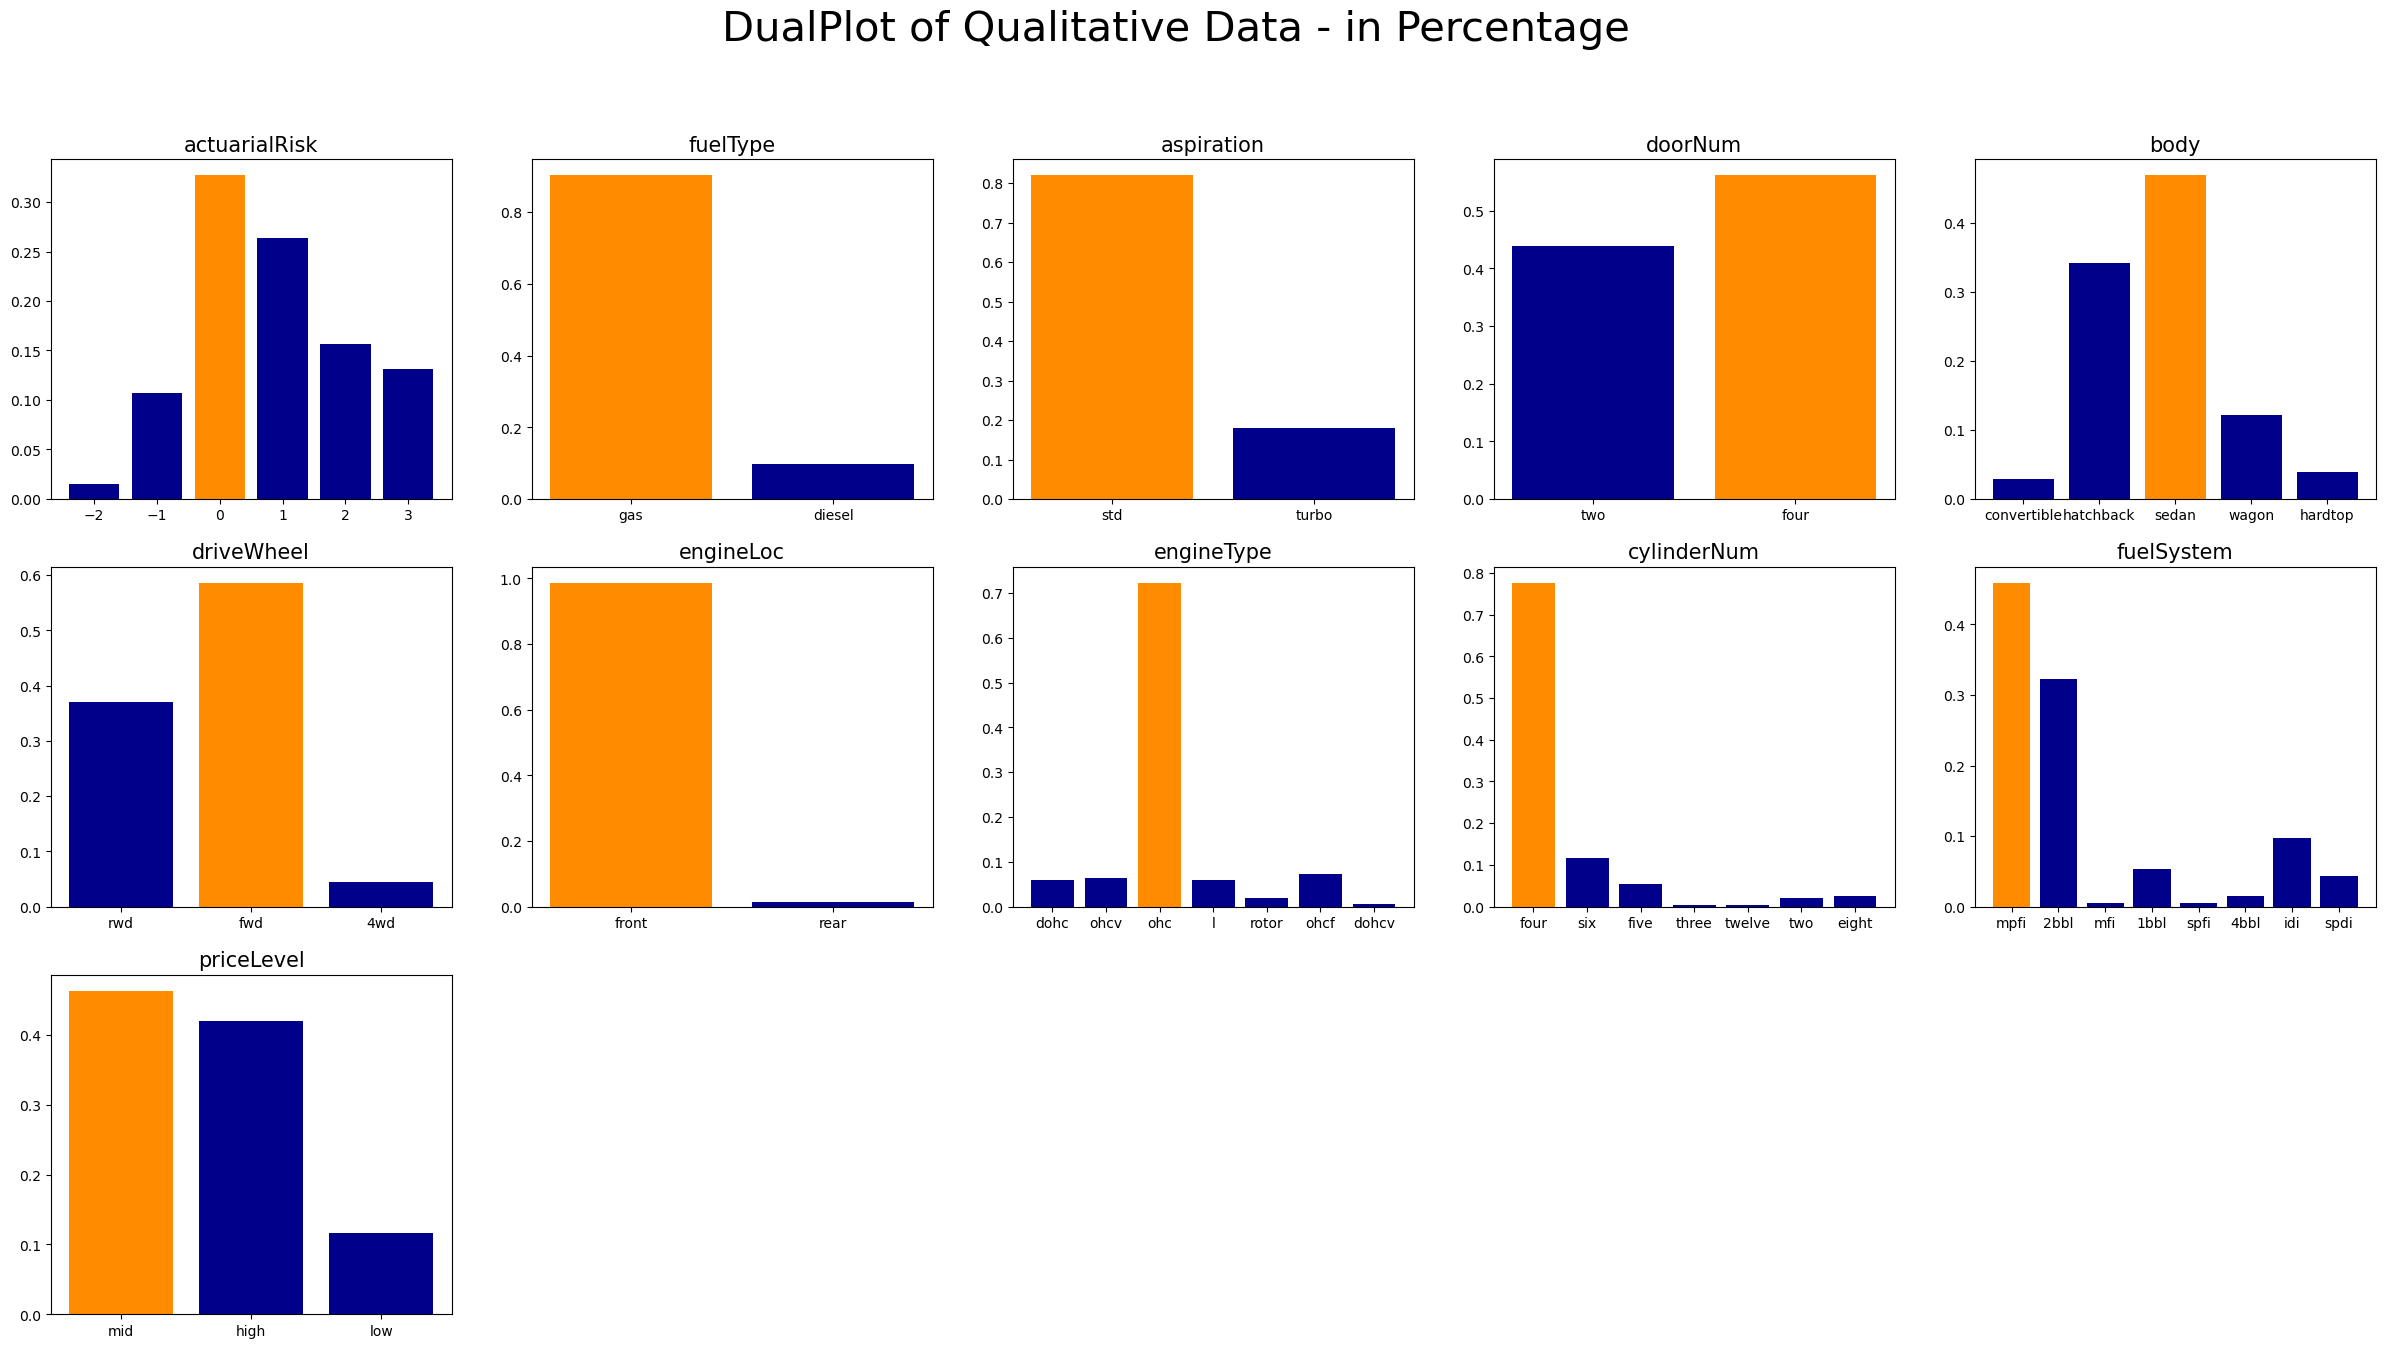

In [1142]:
# Plot qua data except ['Name']
def Plot_qua(input_df) :
    columns = list(input_df.columns)
    col_len = len(columns)
    plt.figure(figsize=(30,15))
    plt.suptitle('DualPlot of Qualitative Data - in Percentage',fontsize=30)
    
    for i in range(col_len) : 
        categories = list(input_df[columns[i]].unique())
        value_per = list(input_df[columns[i]].value_counts(normalize=True,sort=False))
        
        color = ['darkblue'] * len(categories)
        max_index = np.argmax(value_per)
        color[max_index] = 'darkorange'
        
        plt.subplot(3,5,i+1)
        plt.bar(categories,value_per,color=color)
        plt.title(f'{columns[i]}',fontsize=15)

Plot_qua(qua_data)
# Below we can see the relative percentages of categories 

# Relationship - Qua_data vs Price 

# Boxplot 

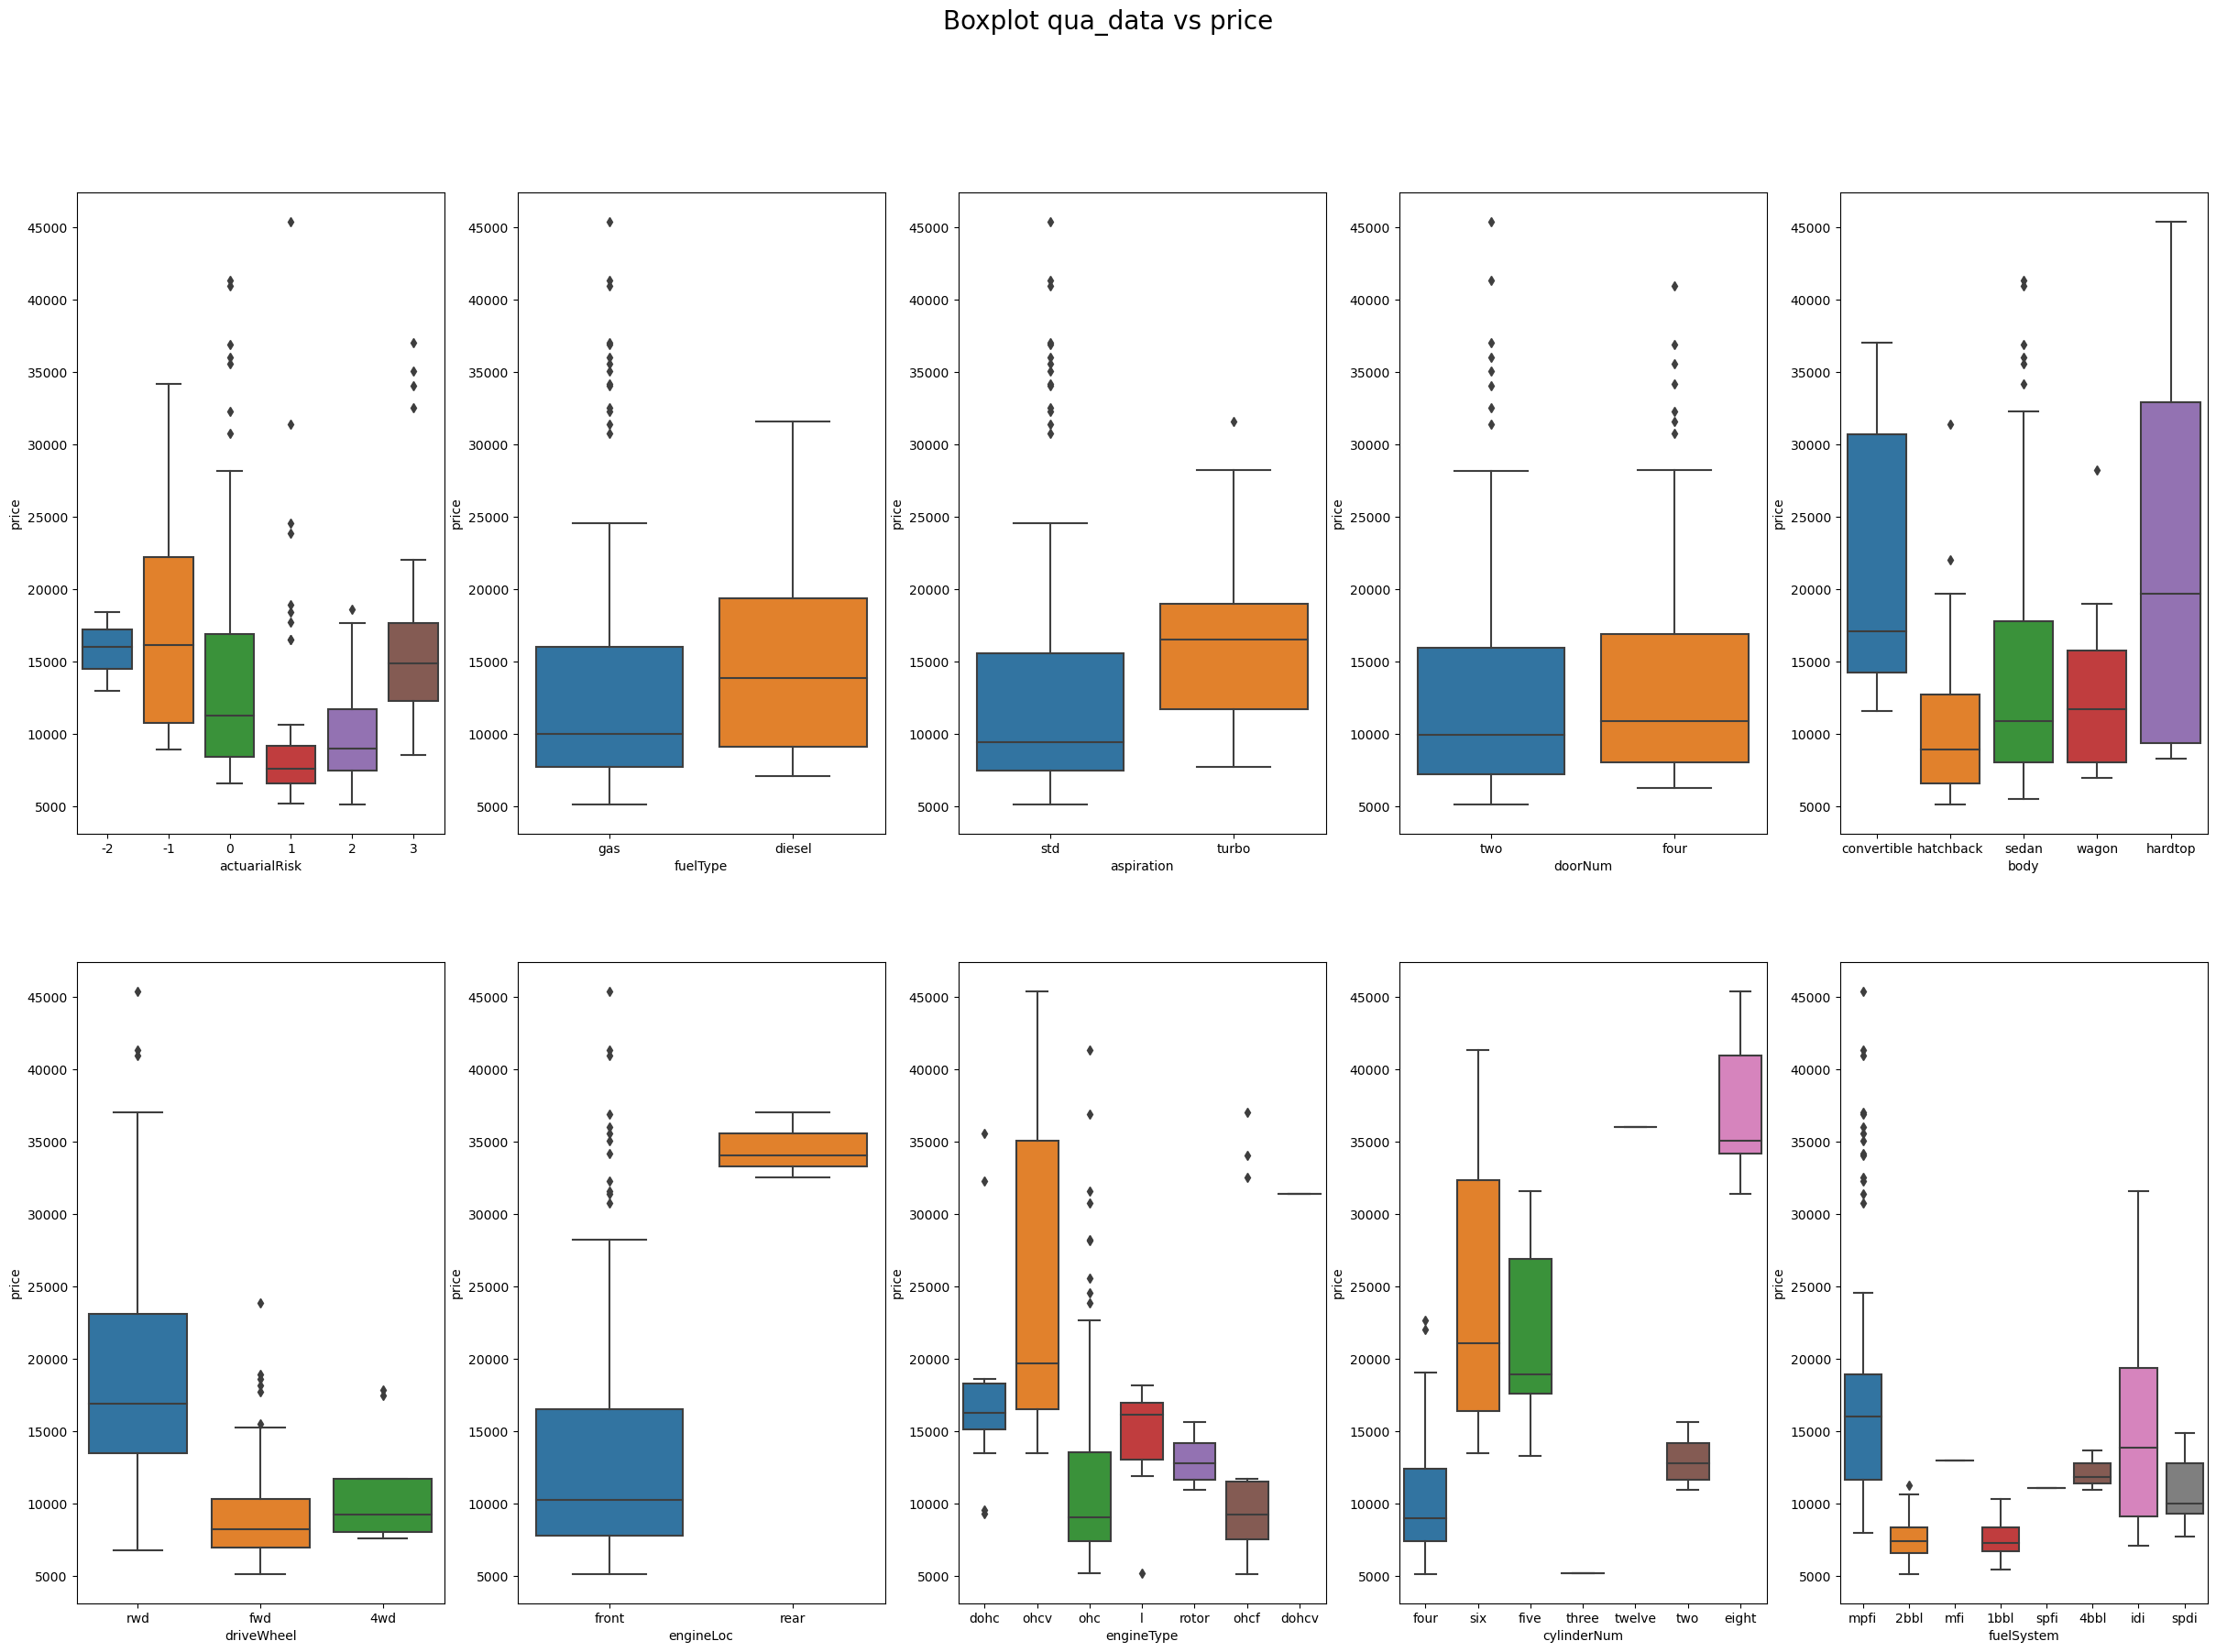

In [1143]:
def plotQua_price(input_df) : 
    plt.figure(figsize=(30,20))
    columns = list(qua_data.drop(['priceLevel'],axis=1).columns)
    col_len = len(columns)
    
    plt.suptitle('Boxplot qua_data vs price',fontsize=20)
    for i in range(col_len) : 
        plt.subplot(2,5,i+1)
        sns.boxplot(x=columns[i],y='price',data=input_df)
    
plotQua_price(df)
# fueltype : diesel avg price > gas 
# aspiration : turbo avg price > std 
# engineLoc : rear avg price > front Chung Ki Jerry Chan

# Relationship - Quan_data vs Price

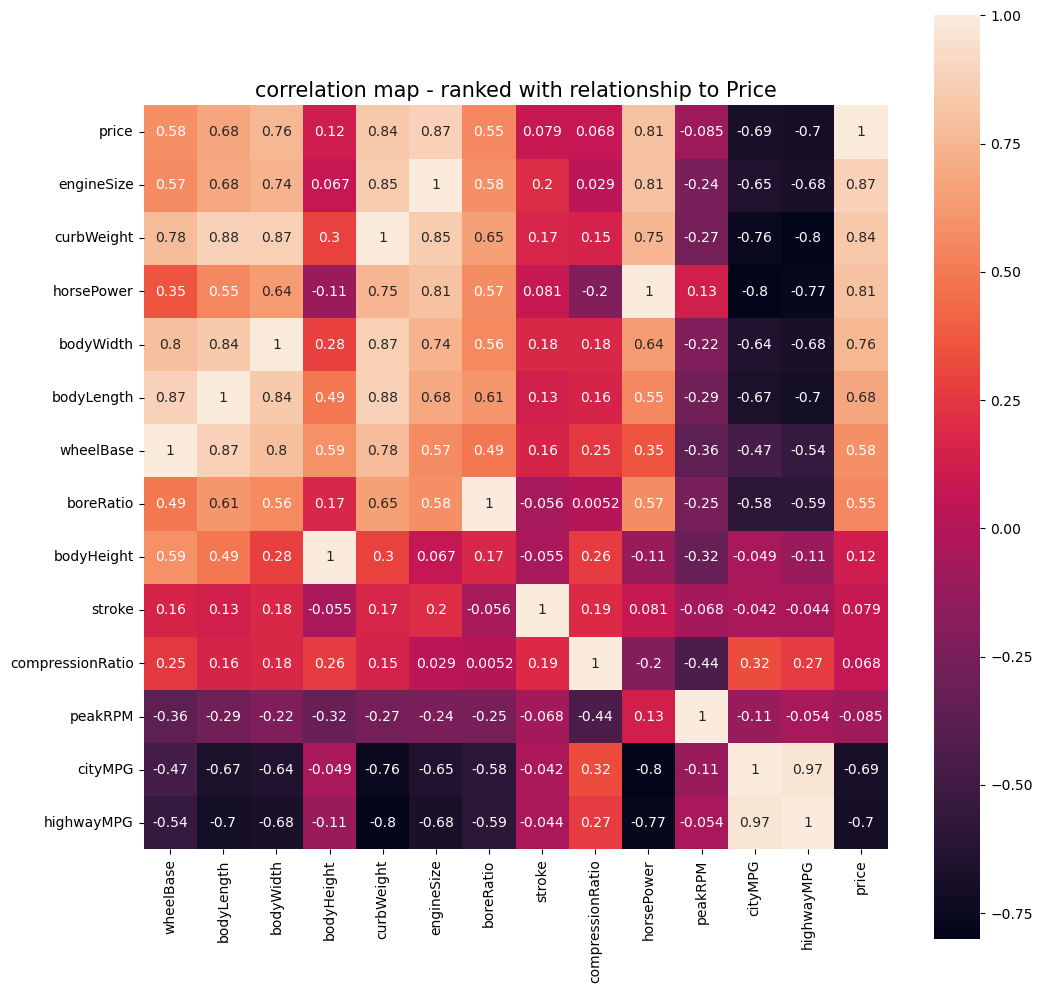

In [1144]:
# plot a heatmap 
# Here , i define : Strong relationship as |corr| >= 0.8 , weak as |corr| <= 0.2
def plot_heatMap(input_df) : 
    plt.figure(figsize=(12,12))
    plt.title('correlation map - ranked with relationship to Price',fontsize=15)

    k = len(list(input_df.corr().columns))
    df_corr = input_df.corr().nlargest(k,'price')

    sns.heatmap(df_corr,vmax=1,square=True,annot=True)

    plt.show()

plot_heatMap(quan_data)
# weak relationship : bodyHeight , stroke , compressionRatio , peakRPM 

# Feature selection : Filtering methods 

# Drop unrelated : Quantitative

In [1145]:
# DROPPING OF QUAN FEATURES : FROM ORIGINAL carPrice_df & quan_data 
unrelated_quan = ['bodyHeight','stroke','compressionRatio','peakRPM']
df.drop(unrelated_quan,axis=1,inplace=True)
quan_data.drop(unrelated_quan,axis=1,inplace=True)
quan_col = list(quan_data.columns)

# 4. Data preprocessing 

# 4.1 Data Cleaning 

In [1146]:
# No need : data is clean enough 

# 4.2 Data transformation 


# Data encoding : one hot encoding

In [1147]:
ohEcoder = OneHotEncoder(sparse=False).fit(qua_data)

def getOHE(df):
    temp_df = pd.DataFrame(data=ohEcoder.transform(qua_data), columns=ohEcoder.get_feature_names_out())
    df.drop(columns=qua_data_col, axis=1, inplace=True)
    df = pd.concat([df.reset_index(drop=True), temp_df], axis=1)
    return df

df = getOHE(df)
print(f'shape of df : {df.shape}')
df.head()

shape of df : (205, 57)


,wheelBase,bodyLength,bodyWidth,curbWeight,engineSize,boreRatio,horsePower,cityMPG,highwayMPG,price,actuarialRisk_-2,actuarialRisk_-1,actuarialRisk_0,actuarialRisk_1,actuarialRisk_2,actuarialRisk_3,fuelType_diesel,fuelType_gas,aspiration_std,aspiration_turbo,doorNum_four,doorNum_two,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,driveWheel_4wd,driveWheel_fwd,driveWheel_rwd,engineLoc_front,engineLoc_rear,engineType_dohc,engineType_dohcv,engineType_l,engineType_ohc,engineType_ohcf,engineType_ohcv,engineType_rotor,cylinderNum_eight,cylinderNum_five,cylinderNum_four,cylinderNum_six,cylinderNum_three,cylinderNum_twelve,cylinderNum_two,fuelSystem_1bbl,fuelSystem_2bbl,fuelSystem_4bbl,fuelSystem_idi,fuelSystem_mfi,fuelSystem_mpfi,fuelSystem_spdi,fuelSystem_spfi,priceLevel_high,priceLevel_low,priceLevel_mid
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# Data scaling : standardisation

In [1148]:
quan_data.head()

,wheelBase,bodyLength,bodyWidth,curbWeight,engineSize,boreRatio,horsePower,cityMPG,highwayMPG,price
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450


In [1149]:
std_scaler = StandardScaler()
df[quan_col] = std_scaler.fit_transform(df[quan_col])

print(f'shape of df : {df.shape}')
df.head()

shape of df : (205, 57)


,wheelBase,bodyLength,bodyWidth,curbWeight,engineSize,boreRatio,horsePower,cityMPG,highwayMPG,price,actuarialRisk_-2,actuarialRisk_-1,actuarialRisk_0,actuarialRisk_1,actuarialRisk_2,actuarialRisk_3,fuelType_diesel,fuelType_gas,aspiration_std,aspiration_turbo,doorNum_four,doorNum_two,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,driveWheel_4wd,driveWheel_fwd,driveWheel_rwd,engineLoc_front,engineLoc_rear,engineType_dohc,engineType_dohcv,engineType_l,engineType_ohc,engineType_ohcf,engineType_ohcv,engineType_rotor,cylinderNum_eight,cylinderNum_five,cylinderNum_four,cylinderNum_six,cylinderNum_three,cylinderNum_twelve,cylinderNum_two,fuelSystem_1bbl,fuelSystem_2bbl,fuelSystem_4bbl,fuelSystem_idi,fuelSystem_mfi,fuelSystem_mpfi,fuelSystem_spdi,fuelSystem_spfi,priceLevel_high,priceLevel_low,priceLevel_mid
0,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.519071,0.174483,-0.646553,-0.546059,0.027392,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.519071,0.174483,-0.646553,-0.546059,0.404462,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.708596,-0.231513,-0.190566,0.514882,0.604046,-2.404880,1.264536,-0.953012,-0.691627,0.404462,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.173698,0.207256,0.136542,-0.420797,-0.431076,-0.517266,-0.053668,-0.186865,-0.109354,0.084486,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.107110,0.207256,0.230001,0.516807,0.218885,-0.517266,0.275883,-1.106241,-1.273900,0.523669,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# Data splitting : X & y 

In [1150]:
y = df['price'].values
X = df.drop(['price'],axis=1)

print(f'shape of :\nX : {X.shape}\ny : {y.shape}')
print(f'type of :\nX : {type(X)}\ny : {type(y)}')

shape of :
X : (205, 56)
y : (205,)
type of :
X : <class 'pandas.core.frame.DataFrame'>
y : <class 'numpy.ndarray'>


# 4.3. Feature Selection 

# RFECV 
( Recursive feature elimination cross-validation ) 

# Compare : Before & After RFECV

# Record Performance - Before

In [1151]:
# we record performance with : 1) r2 , 2) adj_r2 and , 3) RMSE 
linRegModel = LinearRegression().fit(X,y)
y_pred = linRegModel.predict(X)

r2 = float(r2_score(y,y_pred))
adj_r2 = 1 - ((1-r2)*(X.shape[0]-1))/(X.shape[0]-X.shape[1]-1)
RMSE = np.sqrt(mean_squared_error(y,y_pred))

no_rfecv_score = [ r2,adj_r2,RMSE ]
no_rfecv_score = pd.DataFrame(data={'no rfecv' : no_rfecv_score},index=['r2','adj_r2','RMSE'])

In [1152]:
# Then we build RFECV object
# in scoring , i use negative RMSE 

model = LinearRegression()

rfecv = RFECV(estimator=model,
          min_features_to_select=15,
          step=1,
          n_jobs=-1,
          scoring='neg_root_mean_squared_error',
          cv=5
         ).fit(X,y)

selected_col = X.columns[rfecv.support_]
X = X[selected_col]

print(f'Shape of X : {X.shape}')
X.head()

Shape of X : (205, 15)


,bodyWidth,curbWeight,horsePower,body_convertible,engineLoc_front,engineLoc_rear,engineType_dohcv,engineType_ohcv,cylinderNum_eight,cylinderNum_four,cylinderNum_three,fuelSystem_mfi,priceLevel_high,priceLevel_low,priceLevel_mid
0,-0.844782,-0.014566,0.174483,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-0.844782,-0.014566,0.174483,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.190566,0.514882,1.264536,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.136542,-0.420797,-0.053668,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.230001,0.516807,0.275883,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Record Performance - After 

In [1153]:
# Predict and record performance after RFECV

linRegModel = LinearRegression().fit(X,y)
y_pred = linRegModel.predict(X)

r2 = float(r2_score(y,y_pred))
adj_r2 = 1 - ((1-r2)*(X.shape[0]-1))/(X.shape[0]-X.shape[1]-1)
RMSE = np.sqrt(mean_squared_error(y,y_pred))

rfecv_score = [ r2,adj_r2,RMSE ]
rfecv_score = pd.DataFrame(data={'rfecv' : rfecv_score},index=['r2','adj_r2','RMSE'])

# Compare 

In [1154]:
compare_rfecv = pd.concat([rfe_score,no_rfe_score],axis=1)
compare_rfecv
# After removing 36 features , adjusted r2 is not greatly affected . 
# Thus , RFECV is working great . 

,rfe,no rfe
r2,0.939747,0.952499
adj_r2,0.934619,0.936666
RMSE,0.245464,0.217947


# 5. Check assumptions for MLR

In [1155]:
# There are multiple assumptions needed to check 
# To ensure 1) robustness and , 2)reliability of MLR model 
"""
1) Linearity : predictors and target should exhibits linear relationship
    - Residual Analysis 
    
2) Independence of errors : residual of models must be independent to each other 
    - Durbin-Watson Test 
    
3) Homoscedasticity : variance of errors should be constant across all 
                      values of the predictors 
    - Scatterplot 
    
4) Normality : error / residual should be normally distribued.
    - Residual Plot 

5) No Multicollinearity : there should not be strong correlations 
                          between predictors 
    - VIF 
"""

'\n1) Linearity : predictors and target should exhibits linear relationship\n    - Residual Analysis \n    \n2) Independence of errors : residual of models must be independent to each other \n    - Durbin-Watson Test \n    \n3) Homoscedasticity : variance of errors should be constant across all \n                      values of the predictors \n    - Scatterplot \n    \n4) Normality : error / residual should be normally distribued.\n    - Residual Plot \n\n5) No Multicollinearity : there should not be strong correlations \n                          between predictors \n    - VIF \n'

# Before VIF 

In [1156]:
linRegModel = LinearRegression().fit(X,y)
y_pred = linRegModel.predict(X)

r2 = float(r2_score(y,y_pred))
adj_r2 = 1 - ((1-r2)*(X.shape[0]-1))/(X.shape[0]-X.shape[1]-1)
RMSE = np.sqrt(mean_squared_error(y,y_pred))

no_vif_score = [ r2,adj_r2,RMSE ]
no_vif_score = pd.DataFrame(data={'no vif' : no_vif_score},index=['r2','adj_r2','RMSE'])

# VIF : Check for multicollinearity 

VIF : Variane inflation factor , use to check multicollinearity between independent variables 
Rule of thumb , when ... 
( Not gonna cause problems ) 
vif = 1 : Not correlated 
1 <= vif <= 5 : Moderate correlated 
( Gonna cause problems ) 
VIF > 5 : highly correlated 
VIF > 10 : gonna cause problems 

# Check initial status

In [1157]:
# We check for multicollinearity with VIF 
# Since features numbers are large , we choose VIF against correlation matrix 
vif = pd.DataFrame()

vif['Features'] = X.columns
vif['VIF'] = [ variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)

vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
4,engineLoc_front,inf
5,engineLoc_rear,inf
12,priceLevel_high,inf
13,priceLevel_low,inf
14,priceLevel_mid,inf
1,curbWeight,6.70
0,bodyWidth,5.71
2,horsePower,4.23
8,cylinderNum_eight,2.54
9,cylinderNum_four,2.54


In [1158]:
# create function for automating VIF 
# Since 

def VIF(X):
    while True : 
        vif = pd.DataFrame()

        vif['Features'] = X.columns
        vif['VIF'] = [ round(variance_inflation_factor(X.values,i),2) for i in range(X.shape[1]) ]
        vif = vif.sort_values(by='VIF',ascending=False)

        drop_index = int(vif.index[0])
        drop_vif = vif['VIF'][drop_index]
        if ( drop_vif <= 5 ) : 
            break 
        drop_name = vif['Features'][drop_index]

        X = X.drop([drop_name],axis=1)
        vif = vif.drop(index=drop_index,axis=0)
        
    return X , vif 
        
        
X_VIF , vif_final =  VIF(X)

# After VIF 

In [1159]:
vif_final

,Features,VIF
1,horsePower,3.32
0,bodyWidth,2.91
6,cylinderNum_eight,2.50
7,cylinderNum_four,2.27
11,priceLevel_mid,2.22
5,engineType_ohcv,2.04
10,priceLevel_high,2.01
4,engineType_dohcv,1.69
3,engineLoc_rear,1.54
2,body_convertible,1.18


In [1160]:
print(f'shape of X_VIF : {X_VIF .shape}')
X_VIF.head()

shape of X_VIF : (205, 12)


,bodyWidth,horsePower,body_convertible,engineLoc_rear,engineType_dohcv,engineType_ohcv,cylinderNum_eight,cylinderNum_four,cylinderNum_three,fuelSystem_mfi,priceLevel_high,priceLevel_mid
0,-0.844782,0.174483,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.844782,0.174483,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.190566,1.264536,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.136542,-0.053668,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.230001,0.275883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Compare performance before & after VIF 

# After VIF 

In [1182]:
linRegModel = LinearRegression().fit(X_VIF,y)
y_pred = linRegModel.predict(X_VIF)

r2_vif = float(r2_score(y,y_pred))
adj_r2_vif = 1 - ((1-r2)*(X_VIF.shape[0]-1))/(X_VIF.shape[0]-X_VIF.shape[1]-1)
RMSE_vif = np.sqrt(mean_squared_error(y,y_pred))

vif_score = [ r2_vif,adj_r2_vif,RMSE_vif ]
vif_score = pd.DataFrame(data={'vif' : vif_score},index=['r2','adj_r2','RMSE'])

In [1183]:
compare_vif = pd.concat([no_vif_score,vif_score],axis=1)
compare_vif

,no vif,vif
r2,0.943213,0.935261
adj_r2,0.938706,0.939664
RMSE,0.238301,0.254439


# Split data : train-validation-test set 

We need to make sure model could predict well , on unseen data as well , thus we need to split data . 

We are aimming to split : 
train = 0.6
valid = 0.2
test = 0.2 

In [1184]:
# separate train set
train_size = 0.6
seed = 42 
X_train , X_remain , y_train , y_remain = train_test_split(X_VIF,y,train_size=train_size,random_state=seed)

# separate valid and test set from remaining set 
test_size = 0.5
X_valid , X_test , y_valid , y_test = train_test_split(X_remain,y_remain,test_size=test_size,random_state=seed)

# 
print(f'shape of :\nX_train : {X_train.shape} ; X_valid : {X_valid.shape} ; X_test : {X_test.shape}')
print(f'y_train : {y_train.shape} ; y_valid : {y_valid.shape} ; y_test : {y_test.shape}')

shape of :
X_train : (123, 12) ; X_valid : (41, 12) ; X_test : (41, 12)
y_train : (123,) ; y_valid : (41,) ; y_test : (41,)


# 6. Build Model (LR)- with train set 

In [1185]:
linRegModel = LinearRegression().fit(X_train,y_train)
y_train_pred = linRegModel.predict(X_train)

# Evaluate draft model - with r2 and RMSE 

In [1186]:
r2_train = r2_score(y_train,y_train_pred)
adj_r2_train = 1 - ((1-r2)*(X_train.shape[0]-1))/(X_train.shape[0]-X_train.shape[1]-1)
RMSE_train = np.sqrt(mean_squared_error(y_train,y_train_pred))

train_score = [ r2_train,adj_r2_train,RMSE_train ]
train_score = pd.DataFrame(data={'train set' : train_score},index=['r2','adj_r2','RMSE'])

train_score

,train set
r2,0.948644
adj_r2,0.937018
RMSE,0.231496


# 7. Model Evaluation - with validation set

# Predict y_valid_pred , with model trained on train set 

In [1187]:
y_valid_pred = linRegModel.predict(X_valid)

In [1188]:
r2_valid = r2_score(y_valid,y_valid_pred)
adj_r2_valid = 1 - ((1-r2)*(X_valid.shape[0]-1))/(X_valid.shape[0]-X_valid.shape[1]-1)
RMSE_valid = np.sqrt(mean_squared_error(y_valid,y_valid_pred))

valid_score = [ r2_valid,adj_r2_valid,RMSE_valid ]
valid_score = pd.DataFrame(data={'valid set' : valid_score},index=['r2','adj_r2','RMSE'])

valid_score

,valid set
r2,0.867478
adj_r2,0.918875
RMSE,0.275897


# Compare to performance to train_score

In [1189]:
total_score = pd.concat([train_score,valid_score],axis=1)
total_score
# its obvious that the model is not performing that well , on unseen data 

,train set,valid set
r2,0.948644,0.867478
adj_r2,0.937018,0.918875
RMSE,0.231496,0.275897


# Rethink : Should we use other model ? 

In [1190]:
# Prepare all regression model 
models = [ ]
models.append(('LR',LinearRegression()))
models.append(('LASSO',Lasso()))
models.append(('RIDGE',Ridge()))
models.append(('EN',ElasticNet()))

In [1191]:
names = [ ]
kfold_results = [ ]
valid_results = [ ]
train_results = [ ]

num_folds = 10 
scoring = 'neg_mean_squared_error'
seed = 42 

for name , model in models : 
    names.append(name)
    ## K-fold analysis : 
    kfold = KFold(n_splits=10)
    # converte MSE to +ve , the lower the better 
    cv_results = -1*cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    kfold_results.append(cv_results)
    
    #Full training period 
    res = model.fit(X_train,y_train)
    train_result = mean_squared_error(res.predict(X_train),y_train)
    train_results.append(train_result)
    
    # Validation results 
    valid_result = mean_squared_error(res.predict(X_valid),y_valid)
    valid_results.append(valid_result)

# Cross validation results 

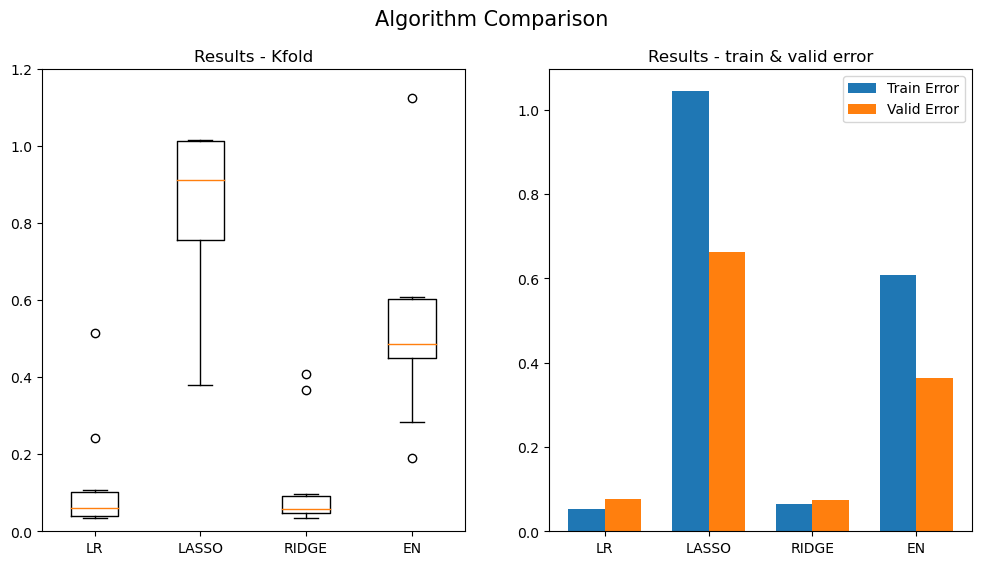

In [1192]:
# Set up graph 
plt.figure(figsize=(12,6))
plt.suptitle('Algorithm Comparison',fontsize=15)

# ax1 = Cross validation results 
ax1 = plt.subplot(1,2,1)
ax1.set_title('Results - Kfold')
ax1.boxplot(kfold_results,labels=names)
plt.ylim(0,1.2)
# you can see 1)LR and , 2) Ridge has lowest error among 

# ax2 = Train and valid error 
ax2 = plt.subplot(1,2,2)
ax2.set_title('Results - train & valid error')

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

ax2.bar(ind - width/2, train_results,  width=width, label='Train Error')
ax2.bar(ind + width/2, valid_results, width=width, label='Valid Error')

ax2.set_xticks(ind)
ax2.set_xticklabels(names)
ax2.legend()
#

plt.show()
# We could perhaps try ridge model 

# 6. re-Build Model (Ridge) - with train set 

# Predict & evaluate on train set 

In [1193]:
ridgeCVModel = RidgeCV(alphas=[0.1,0.5,1,1.5,2,10]).fit(X_train,y_train)
y_train_pred_l2 = ridgeCVModel.predict(X_train)

In [1194]:
ridgeCVModel.alpha_

1.0

In [1195]:
# evaluate ridgeCV on train set 
r2_train_l2 = r2_score(y_train,y_train_pred_l2)
adj_r2_train_l2 = 1 - ((1-r2)*(X_train.shape[0]-1))/(X_train.shape[0]-X_train.shape[1]-1)
RMSE_train_l2 = np.sqrt(mean_squared_error(y_train,y_train_pred_l2))

train_score_l2 = [ r2_train_l2,adj_r2_train_l2,RMSE_train_l2 ]
train_score_l2 = pd.DataFrame(data={'train set' : train_score_l2},index=['r2','adj_r2','RMSE'])

# Predict & evaluate on valid set

In [1196]:
y_valid_pred_l2 = ridgeCVModel.predict(X_valid)

In [1197]:
# evaluate ridgeCV on valid set 
r2_valid_l2 = r2_score(y_valid,y_valid_pred_l2)
adj_r2_valid_l2 = 1 - ((1-r2)*(X_valid.shape[0]-1))/(X_valid.shape[0]-X_valid.shape[1]-1)
RMSE_valid_l2 = np.sqrt(mean_squared_error(y_valid,y_valid_pred_l2))

valid_score_l2 = [ r2_valid_l2,adj_r2_valid_l2,RMSE_valid_l2 ]
valid_score_l2 = pd.DataFrame(data={'valid set' : valid_score_l2},index=['r2','adj_r2','RMSE'])

# concat two df 
total_score_l2 = pd.concat([train_score_l2,valid_score_l2],axis=1)
total_score_l2

,train set,valid set
r2,0.937129,0.870446
adj_r2,0.937018,0.918875
RMSE,0.256138,0.272790


In [1198]:
total_score

,train set,valid set
r2,0.948644,0.867478
adj_r2,0.937018,0.918875
RMSE,0.231496,0.275897


Therefore , by comparing ridge and OLS with above metrics , we choose RIDGE regression ( alpha_ = 1.5 ) 

# 7. Model evaluation 

Since we have used RidgeCV to find the optimal alpha_ , theres no need to perform gradient descent to look for optimal alpha_

# 8. Make Prediction - with test set 

In [1199]:
y_test_pred = ridgeCVModel.predict(X_test)

In [1200]:
# evaluate ridgeCV on valid set 
r2_test = r2_score(y_test,y_test_pred)
adj_r2_test = 1 - ((1-r2)*(X_test.shape[0]-1))/(X_test.shape[0]-X_test.shape[1]-1)
RMSE_test = np.sqrt(mean_squared_error(y_test,y_test_pred))

test_score = [ r2_test,adj_r2_test,RMSE_test ]
test_score = pd.DataFrame(data={'test set' : test_score},index=['r2','adj_r2','RMSE'])

# concat two df 
total_score_l2 = pd.concat([total_score_l2,test_score],axis=1)
total_score_l2

,train set,valid set,test set
r2,0.937129,0.870446,0.911425
adj_r2,0.937018,0.918875,0.918875
RMSE,0.256138,0.272790,0.328185


# Visualise metrics - compare performance of diff set

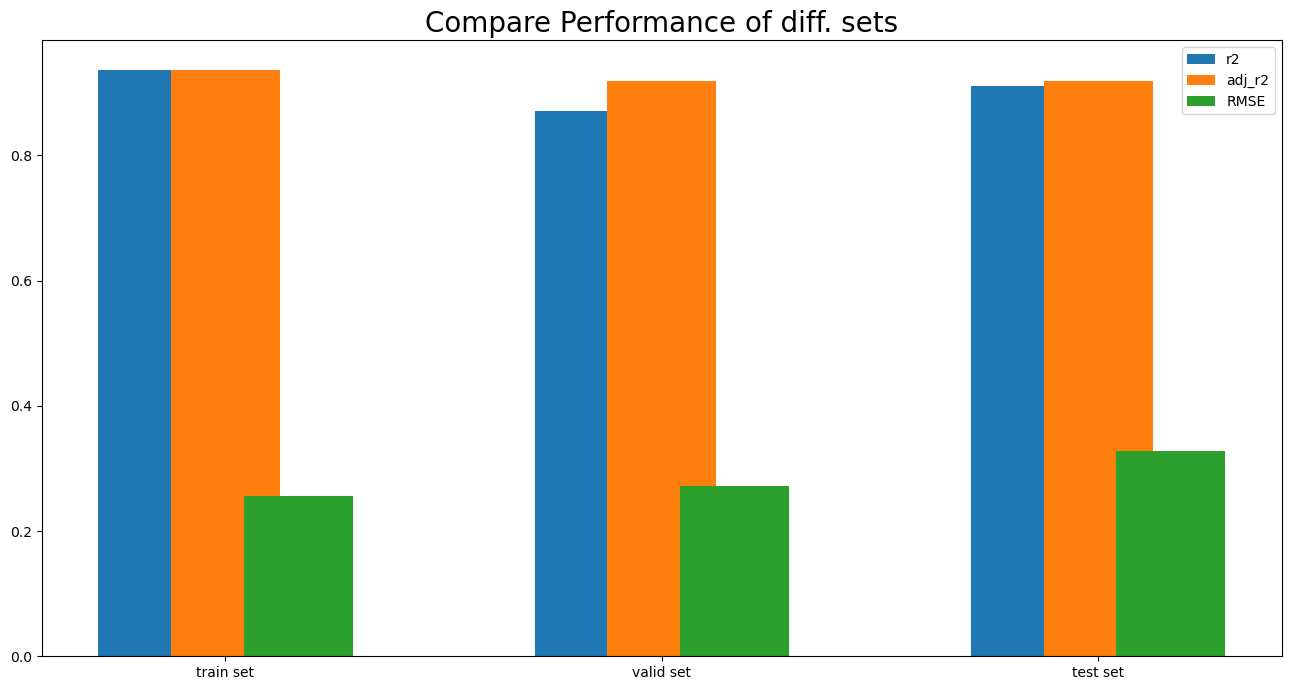

In [1202]:
plt.figure(figsize=(16,8))
plt.title('Compare Performance of diff. sets',fontsize=20)
tickers = list(total_score_l2.columns)

ax = plt.subplot(111)

ind = np.arange(len(tickers))  # the x locations for the groups
width = 0.25  # the width of the bars

plt.bar(ind - width/1.5, total_score_l2.loc['r2',:],  width=width, label='r2')
plt.bar(ind , total_score_l2.loc['adj_r2',:], width=width, label='adj_r2')
plt.bar(ind + width/1.5,total_score_l2.loc['RMSE',:],width=width,label='RMSE')

ax.set_xticks(ind)
ax.set_xticklabels(tickers)
ax.legend()

plt.show()

# Conclusion 

 - RFECV : Maintain similar performance after removing 36 features 

- Reduce generalisation error by : 15% 